In [1]:
import pandas as pd

In [15]:
store = pd.HDFStore("../storage/encode_staging.hdf")
store.keys()[0:42]

['/CL_0000047_hg19_DNase_H3K27ac_bed',
 '/CL_0000084_hg19_DNase_H3K27ac_bed',
 '/CL_0000127_hg19_DNase_H3K27ac_bed',
 '/CL_0000236_hg19_DNase_H3K27ac_bed',
 '/CL_0000312_hg19_DNase_H3K27ac_bed',
 '/CL_0000351_hg19_DNase_H3K27ac_bed',
 '/CL_0000515_hg19_DNase_H3K27ac_bed',
 '/CL_0000623_hg19_DNase_H3K27ac_bed',
 '/CL_0001054_hg19_DNase_H3K27ac_bed',
 '/CL_0001059_hg19_DNase_H3K27ac_bed',
 '/CL_0002327_hg19_DNase_H3K27ac_bed',
 '/CL_0002372_hg19_DNase_H3K27ac_bed',
 '/CL_0002551_hg19_DNase_H3K27ac_bed',
 '/CL_0002553_hg19_DNase_H3K27ac_bed',
 '/CL_0002618_hg19_DNase_H3K27ac_bed',
 '/CL_1001608_hg19_DNase_H3K27ac_bed',
 '/CL_2000045_hg19_DNase_H3K27ac_bed',
 '/EFO_0000586_hg19_DNase_H3K27ac_bed',
 '/EFO_0001187_hg19_DNase_H3K27ac_bed',
 '/EFO_0001203_hg19_DNase_H3K27ac_bed',
 '/EFO_0002067_hg19_DNase_H3K27ac_bed',
 '/EFO_0002713_hg19_DNase_H3K27ac_bed',
 '/EFO_0002784_hg19_DNase_H3K27ac_bed',
 '/EFO_0002791_hg19_DNase_H3K27ac_bed',
 '/EFO_0002824_hg19_DNase_H3K27ac_bed',
 '/EFO_0003042_hg

In [16]:
len(pd.read_hdf("../storage/encode_staging.hdf", "filtered_hg19_DNase_H3K27ac_bed"))/42 * 437

18578534.761904765

In [103]:
import numpy as np
import pandas as pd

encode_fantom_df = pd.DataFrame.from_csv('/Users/manuel/development/thesis/overlap/filtered_hg19DNase_H3K27ac_FANTOM_overlapped.csv', sep="\t")
encode_fantom_df.reset_index(level=0, inplace=True)

In [104]:
encode_fantom_df.T

0        \
chrom                                                             chr3   
start                                                        152855118   
end                                                          152861069   
name                                            ENCODE.3.ENCFF778PVS.0   
score                                                                1   
strand                                                               .   
size                                                              5951   
method                                                   DNase_H3K27ac   
description          Enhancer-like regions using DNase and H3K27ac ...   
assembly                                                          hg19   
biosample_type                                            primary cell   
biosample_term_id                                           CL:0002327   
biosample_term_name                            mammary epithelial cell   
developmental_slims                                       ['ectoderm']   
system_slims                                   ['integumental system']   
organ_slims                                          ['mammary gland']   
encyclopedia                                                    ENCODE   
FA_chrom                                                             .   
FA_start                                                            -1   
FA_end                                                              -1   
FA_name                                                              .   
FA_score                                                            -1   
FA_size                                                              0   
FA_method                                                            .   
FA_ovlp_len                                                          0   
FA_ovlp_pct                                                          0   
FA_encyclopedia                                                      .   

                                                               1        \
chrom                                                             chr1   
start                                                        214611302   
end                                                          214622352   
name                                            ENCODE.3.ENCFF778PVS.1   
score                                                                1   
strand                                                               .   
size                                                             11050   
method                                                   DNase_H3K27ac   
description          Enhancer-like regions using DNase and H3K27ac ...   
assembly                                                          hg19   
biosample_type                                            primary cell   
biosample_term_id                                           CL:0002327   
biosample_term_name                            mammary epithelial cell   
developmental_slims                                       ['ectoderm']   
system_slims                                   ['integumental system']   
organ_slims                                          ['mammary gland']   
encyclopedia                                                    ENCODE   
FA_chrom                                                             .   
FA_start                                                            -1   
FA_end                                                              -1   
FA_name                                                              .   
FA_score                                                            -1   
FA_size                                                              0   
FA_method                                                            .   
FA_ovlp_len                                                          0   
FA_ovlp_pct                                                       

In [105]:
encode_fantom_df[['FA_size', 'FA_ovlp_len', 'FA_ovlp_pct']].describe()

FA_size   FA_ovlp_len   FA_ovlp_pct
count  1.801781e+06  1.801781e+06  1.801781e+06
mean   4.735484e+01  3.952389e+01  4.582093e+00
std    1.477957e+02  1.292502e+02  1.652188e+01
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00  0.000000e+00
max    2.860000e+03  2.860000e+03  1.000000e+02

In [106]:
# filter only valid overlaps
df = encode_fantom_df.query("FA_ovlp_pct > 0")

In [107]:
print("Valid overlaps:", len(df), "on", len(encode_fantom_df), " Ratio:", len(df)/len(encode_fantom_df)) 

Valid overlaps: 212041 on 1801781  Ratio: 0.11768411366309224


In [108]:
df[['FA_size', 'FA_ovlp_len', 'FA_ovlp_pct']].describe()

FA_size    FA_ovlp_len    FA_ovlp_pct
count  212041.000000  212041.000000  212041.000000
mean      402.389387     335.847327      38.935524
std       206.760548     205.994536      31.336400
min        15.000000      15.000000      10.000000
25%       273.000000     150.000000      15.332266
50%       368.000000     309.000000      24.464061
75%       474.000000     426.000000      52.891566
max      2860.000000    2860.000000     100.000000

In [109]:
df.corr()

start       end  score      size  FA_start    FA_end  \
start        1.000000  1.000000    NaN  0.012405  1.000000  1.000000   
end          1.000000  1.000000    NaN  0.012427  1.000000  1.000000   
score             NaN       NaN    NaN       NaN       NaN       NaN   
size         0.012405  0.012427    NaN  1.000000  0.012415  0.012417   
FA_start     1.000000  1.000000    NaN  0.012415  1.000000  1.000000   
FA_end       1.000000  1.000000    NaN  0.012417  1.000000  1.000000   
FA_score     0.004837  0.004840    NaN  0.134370  0.004837  0.004839   
FA_size      0.004097  0.004105    NaN  0.365432  0.004099  0.004103   
FA_ovlp_len  0.009359  0.009374    NaN  0.656276  0.009365  0.009368   
FA_ovlp_pct -0.007741 -0.007756    NaN -0.669150 -0.007749 -0.007748   

             FA_score   FA_size  FA_ovlp_len  FA_ovlp_pct  
start        0.004837  0.004097     0.009359    -0.007741  
end          0.004840  0.004105     0.009374    -0.007756  
score             NaN       NaN          NaN          NaN  
size         0.134370  0.365432     0.656276    -0.669150  
FA_start     0.004837  0.004099     0.009365    -0.007749  
FA_end       0.004839  0.004103     0.009368    -0.007748  
FA_score     1.000000  0.379368     0.312687     0.036999  
FA_size      0.379368  1.000000     0.764330     0.103771  
FA_ovlp_len  0.312687  0.764330     1.000000    -0.295263  
FA_ovlp_pct  0.036999  0.103771    -0.295263     1.000000

In [110]:
df_ovlp = df[['FA_ovlp_len', 'FA_ovlp_pct']]

/Users/manuel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


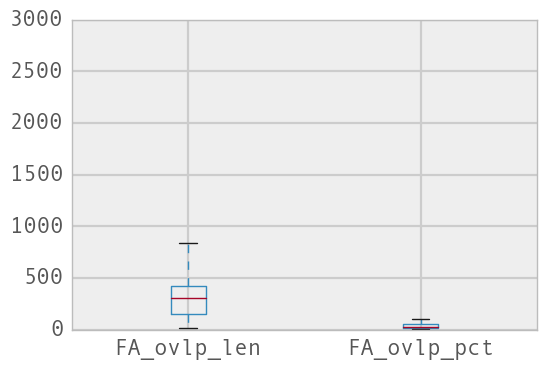

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.mpl_style = 'default' # Sets the plotting display theme to ggplot2
plt.show(df_ovlp.plot(kind = 'box'))

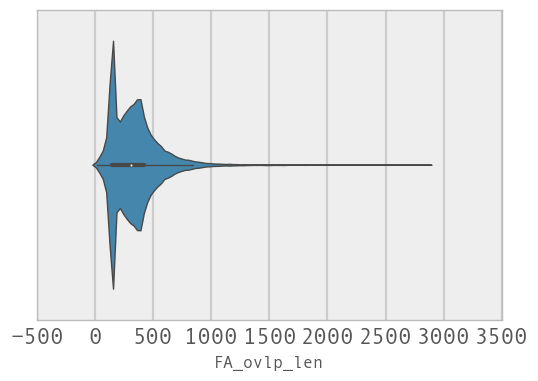

In [112]:
import seaborn as sns
ax = sns.violinplot(x="FA_ovlp_len", data=df)
#ax = sns.violinplot(x="day", y="total_bill", hue="smoker", data=df_ovlp, palette="muted")

/Users/manuel/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


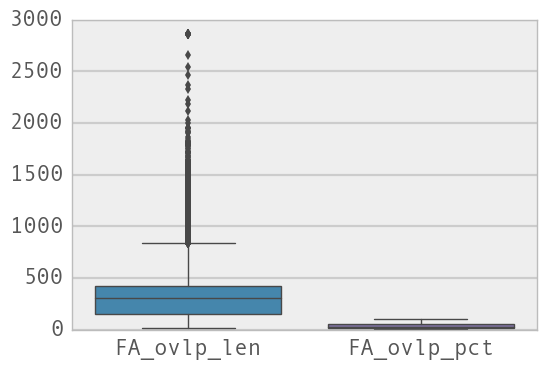

In [113]:
# Import the seaborn library
import seaborn as sns

# Do the boxplot
plt.show(sns.boxplot(df_ovlp))

In [114]:
encode_fantom_df.columns[0:16]

Index(['chrom', 'start', 'end', 'name', 'score', 'strand', 'size', 'method',
       'description', 'assembly', 'biosample_type', 'biosample_term_id',
       'biosample_term_name', 'developmental_slims', 'system_slims',
       'organ_slims'],
      dtype='object')

In [115]:
# extract encode only data
df_encode_only = encode_fantom_df[['chrom', 'start', 'end', 'name', 'score', 'strand', 'size', 'method',
       'description', 'assembly', 'biosample_type', 'biosample_term_id',
       'biosample_term_name', 'developmental_slims', 'system_slims',
       'organ_slims', 'encyclopedia']]
#df_encode_only.reset_index(level=0, inplace=True)
df_encode_only = df_encode_only.drop_duplicates(subset='name')

df_encode_only.T

0        \
chrom                                                             chr3   
start                                                        152855118   
end                                                          152861069   
name                                            ENCODE.3.ENCFF778PVS.0   
score                                                                1   
strand                                                               .   
size                                                              5951   
method                                                   DNase_H3K27ac   
description          Enhancer-like regions using DNase and H3K27ac ...   
assembly                                                          hg19   
biosample_type                                            primary cell   
biosample_term_id                                           CL:0002327   
biosample_term_name                            mammary epithelial cell   
developmental_slims                                       ['ectoderm']   
system_slims                                   ['integumental system']   
organ_slims                                          ['mammary gland']   
encyclopedia                                                    ENCODE   

                                                               1        \
chrom                                                             chr1   
start                                                        214611302   
end                                                          214622352   
name                                            ENCODE.3.ENCFF778PVS.1   
score                                                                1   
strand                                                               .   
size                                                             11050   
method                                                   DNase_H3K27ac   
description          Enhancer-like regions using DNase and H3K27ac ...   
assembly                                                          hg19   
biosample_type                                            primary cell   
biosample_term_id                                           CL:0002327   
biosample_term_name                            mammary epithelial cell   
developmental_slims                                       ['ectoderm']   
system_slims                                   ['integumental system']   
organ_slims                                          ['mammary gland']   
encyclopedia                                                    ENCODE   

                                                               2        \
chrom                                                            chr15   
start                                                        101260386   
end                                                          101269291   
name                                            ENCODE.3.ENCFF778PVS.2   
score                                                                1   
strand                                                               .   
size                                                              8905   
method                                                   DNase_H3K27ac   
description          Enhancer-like regions using DNase and H3K27ac ...   
assembly                                                          hg19   
biosample_type                                            primary cell   
biosample_term_id                                           CL:0002327   
biosample_term_name                            mammary epithelial cell   
developmental_slims                                       ['ectoderm']   
system_slims                                   ['integumental system']   
organ_slims                                          ['mammary gland']   
encyclopedia                                                    ENCODE   

                                                               3

In [116]:
df_encode_only[['biosample_type', 'biosample_term_name', 'size']].groupby(['biosample_type', 'biosample_term_name']).agg(['mean', 'count'])

size  \
                                                                                    mean   
biosample_type                     biosample_term_name                                     
immortalized cell line             GM12878                                   1438.693603   
                                   HCT116                                     902.016401   
                                   HeLa-S3                                   1774.904315   
                                   HepG2                                     1382.624615   
                                   K562                                      1198.229849   
                                   MCF-7                                      656.594641   
                                   Panc1                                     1542.574274   
in vitro differentiated cells      mesenchymal stem cell                     1093.750324   
                                   mesendoderm                               1232.427527   
                                   myotube                                   1975.936164   
induced pluripotent stem cell line iPS DF 19.11                               719.244243   
                                   iPS DF 6.9                                 297.177590   
primary cell                       B cell                                    1186.026403   
                                   CD14-positive monocyte                    1182.241397   
                                   IMR-90                                    1709.433985   
                                   T-cell                                    1439.534273   
                                   astrocyte                                 1880.022577   
                                   common myeloid progenitor, CD34-positive  1396.564064   
                                   endothelial cell of umbilical vein        1706.773870   
                                   fibroblast of dermis                      1120.012899   
                                   fibroblast of lung                        1408.926736   
                                   foreskin fibroblast                       1491.468119   
                                   foreskin melanocyte                        575.255923   
                                   keratinocyte                              1924.942176   
                                   mammary epithelial cell                   1637.380951   
                                   natural killer cell                       1364.689730   
                                   skeletal muscle myoblast                  1617.188852   
                                   trophoblast cell                          1295.317072   
stem cell                          H1-hESC                                    701.688252   
                                   H9                                         508.000071   
                                   neuronal stem cell                         531.558355   
tissue                             adrenal gland                             2041.979215   
                                   female gonad                               972.856764   
                                   large intestine                           2117.187024   
                                   muscle of leg                             1885.973494   
                                   muscle of trunk                           1456.215860   
                                   pancreas                                   831.016190   
                                   placenta                                  1879.675949   
                                   psoas muscle                              1140.177574   
                                   small intestine                           1752.870213   
                                   stomach                                   1410.306691   
                                   t

In [117]:
encode_fantom_df.columns

Index(['chrom', 'start', 'end', 'name', 'score', 'strand', 'size', 'method',
       'description', 'assembly', 'biosample_type', 'biosample_term_id',
       'biosample_term_name', 'developmental_slims', 'system_slims',
       'organ_slims', 'encyclopedia', 'FA_chrom', 'FA_start', 'FA_end',
       'FA_name', 'FA_score', 'FA_size', 'FA_method', 'FA_ovlp_len',
       'FA_ovlp_pct', 'FA_encyclopedia'],
      dtype='object')

In [118]:
# extract fantom only data
df_fantom_only = encode_fantom_df[['biosample_type', 'biosample_term_name', 'FA_chrom', 'FA_start', 'FA_end',
       'FA_name', 'FA_score', 'FA_size', 'FA_method', 'FA_encyclopedia']]
#df_encode_only.reset_index(level=0, inplace=True)
df_fantom_only = df_fantom_only.query("FA_name != '.'")
df_fantom_only = df_fantom_only.drop_duplicates(subset='FA_name')

df_fantom_only.T

6                          8        \
biosample_type                   primary cell               primary cell   
biosample_term_name   mammary epithelial cell    mammary epithelial cell   
FA_chrom                                chr10                       chr3   
FA_start                              3893365                    5067974   
FA_end                                3894190                    5068590   
FA_name              FANTOM.5.PERMISSIVE.3965  FANTOM.5.PERMISSIVE.26422   
FA_score                                  693                        256   
FA_size                                   825                        616   
FA_method                            CAGE_TCs                   CAGE_TCs   
FA_encyclopedia                        FANTOM                     FANTOM   

                                       9                          10       \
biosample_type                    primary cell               primary cell   
biosample_term_name    mammary epithelial cell    mammary epithelial cell   
FA_chrom                                  chr8                       chr8   
FA_start                             126231490                  126232175   
FA_end                               126231859                  126232753   
FA_name              FANTOM.5.PERMISSIVE.39851  FANTOM.5.PERMISSIVE.39852   
FA_score                                   140                        291   
FA_size                                    369                        578   
FA_method                             CAGE_TCs                   CAGE_TCs   
FA_encyclopedia                         FANTOM                     FANTOM   

                                      13                        16       \
biosample_type                   primary cell              primary cell   
biosample_term_name   mammary epithelial cell   mammary epithelial cell   
FA_chrom                                chr11                     chr10   
FA_start                             94480491                   3848037   
FA_end                               94481212                   3849536   
FA_name              FANTOM.5.PERMISSIVE.7393  FANTOM.5.PERMISSIVE.3954   
FA_score                                   13                       339   
FA_size                                   721                      1499   
FA_method                            CAGE_TCs                  CAGE_TCs   
FA_encyclopedia                        FANTOM                    FANTOM   

                                       22                        26       \
biosample_type                    primary cell              primary cell   
biosample_term_name    mammary epithelial cell   mammary epithelial cell   
FA_chrom                                  chr6                      chr1   
FA_start                             159273925                 145113904   
FA_end                               159274893                 145114998   
FA_name              FANTOM.5.PERMISSIVE.35853  FANTOM.5.PERMISSIVE.1955   
FA_score                                   807                      2794   
FA_size                                    968                      1094   
FA_method                             CAGE_TCs                  CAGE_TCs   
FA_encyclopedia                         FANTOM                    FANTOM   

                                      36                        37       \
biosample_type                   primary cell              primary cell   
biosample_term_name   mammary epithelial cell   mammary epithelial cell   
FA_chrom                                 chr1                      chr1   
FA_start                            235133014                 235134086   
FA_end                              235133422                 235134438   
FA_name              FANTOM.5.PERMISSIVE.3671  FANTOM.5.PERMISSIVE.3672   
FA_score                                  135                        45   
FA_size                                   408                       352   
FA_method      

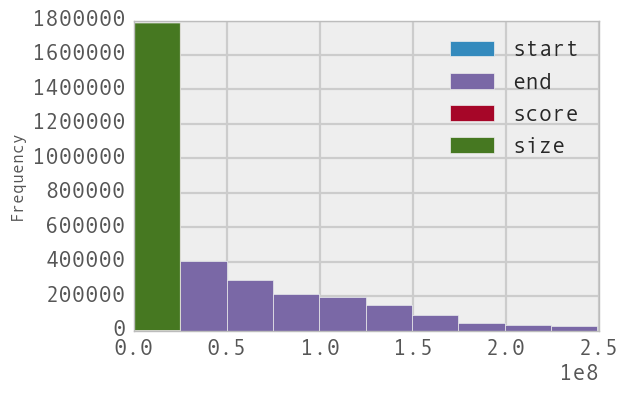

In [119]:
df_encode_only.plot.hist()

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


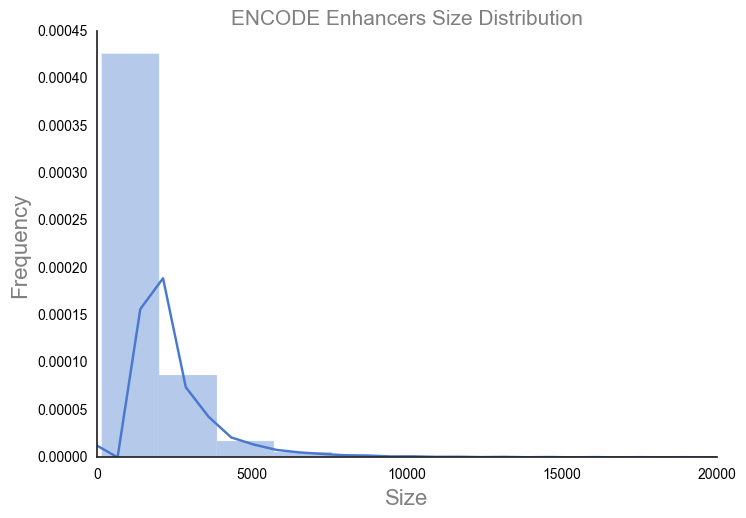

In [120]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
g = sns.distplot(df_encode_only[['size']], kde=True, color="b")
g.axes.set_title('ENCODE Enhancers Size Distribution', fontsize=15,color="black",alpha=0.5)
g.set_xlim(0,20000)
# Set the xlabel of the graph from here
g.set_xlabel("Size",size = 16,color="black",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Frequency",size = 16,color="black",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=10,labelcolor="black")
ax.set_xscale("log")
ax.set_yscale("log")

sns.despine(offset=0,trim=True)


In [121]:
df_encode_only[['size']].describe()

size
count  1.785580e+06
mean   1.312961e+03
std    1.489315e+03
min    1.500000e+02
25%    1.500000e+02
50%    1.038000e+03
75%    1.815000e+03
max    9.282900e+04

In [122]:
df_fantom_only[['biosample_type', 'biosample_term_name', 'FA_size']].groupby(
    ['biosample_type']).agg(['mean', 'std', 'count'])

FA_size                   
                                          mean         std  count
biosample_type                                                   
immortalized cell line              301.963459  142.386219   2463
in vitro differentiated cells       294.759363  146.968081   1068
induced pluripotent stem cell line  260.228374  127.123340    289
primary cell                        342.952579  173.807632  14403
stem cell                           265.414002  131.109719   1157
tissue                              332.147717  163.914246   7643

In [123]:
df_encode_only[['biosample_type', 'size']].groupby(
    ['biosample_type']).agg(['mean', 'std', 'count'])

size                     
                                           mean          std   count
biosample_type                                                      
immortalized cell line              1271.881017  1671.447875  259810
in vitro differentiated cells       1417.859082  1316.515856  108084
induced pluripotent stem cell line   522.240949   640.445158   80382
primary cell                        1425.059923  1517.171381  659128
stem cell                            608.830747   775.192234  173125
tissue                              1532.560605  1556.004499  505051

In [124]:
df_fantom_only[['FA_size']].describe()

FA_size
count  27023.000000
mean     330.051438
std      166.579846
min       15.000000
25%      217.000000
50%      309.000000
75%      397.000000
max     2860.000000

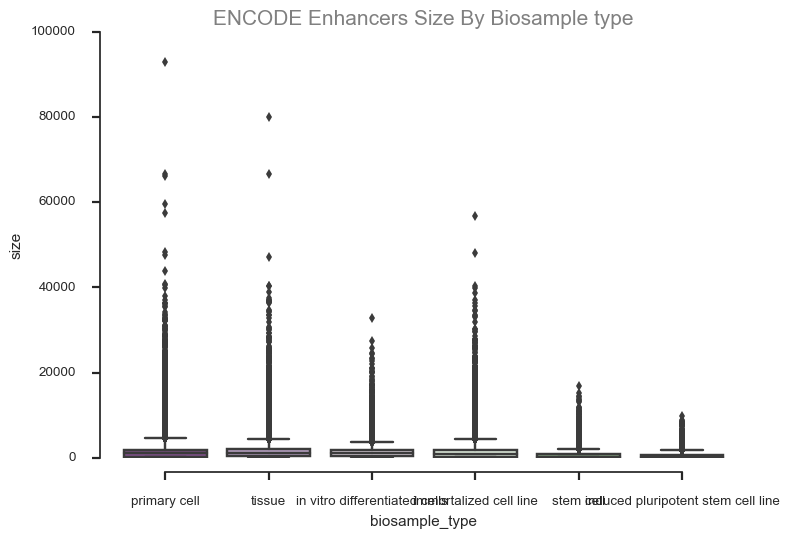

In [125]:
import seaborn as sns
plot = sns.boxplot(x="biosample_type", y="size", data=df_encode_only, palette="PRGn")
plot.axes.set_title('ENCODE Enhancers Size By Biosample type', fontsize=15,color="black",alpha=0.5)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.5})
#plot.set_ybound(upper=10000)
#plot.set_xticklabels(labels=df_encode_only['biosample_type'].unique())
#for item in plot.get_xticklabels():
#    item.set_rotation(90)
#plot.set_yscale("log")
sns.despine(offset=10, trim=True)

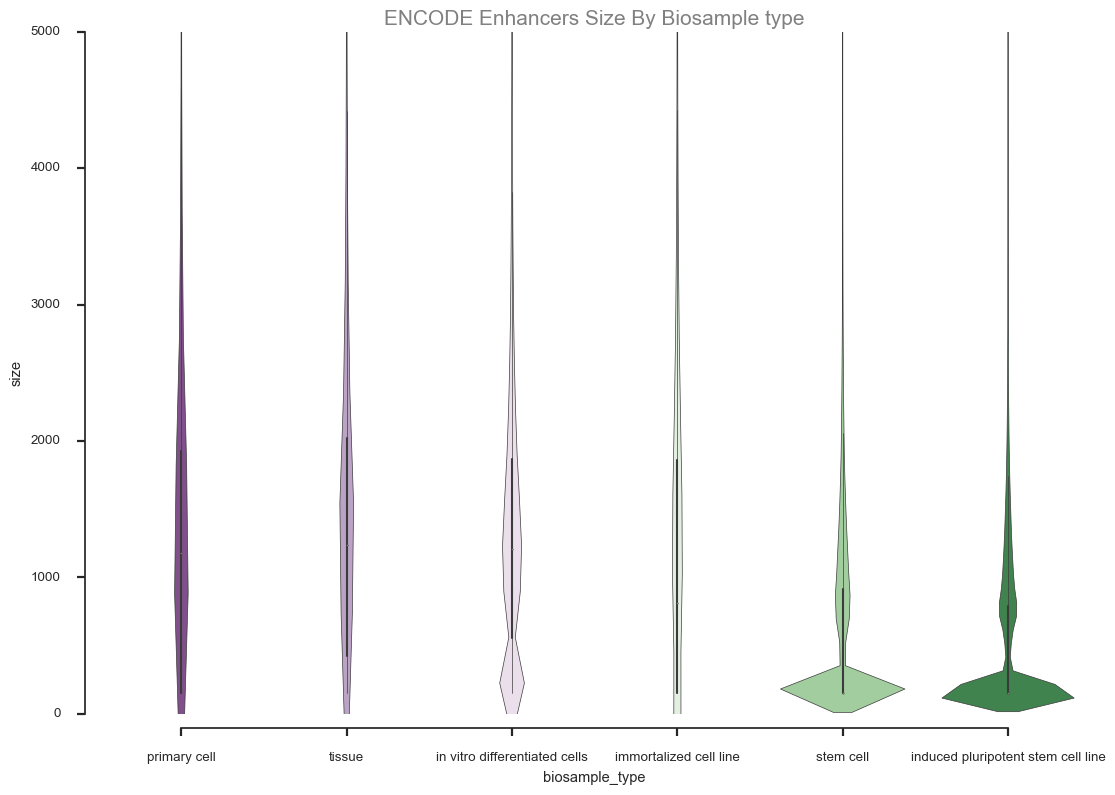

In [126]:
import seaborn as sns
plot = sns.violinplot(x="biosample_type", y="size", data=df_encode_only, palette="PRGn")
plot.axes.set_title('ENCODE Enhancers Size By Biosample type', fontsize=15,color="black",alpha=0.5)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.5})
plot.set_ybound(lower=0, upper=5000)
#plot.set_xticklabels(labels=df_encode_only['biosample_type'].unique())
#for item in plot.get_xticklabels():
#    item.set_rotation(90)
#plot.set_yscale("log")
sns.despine(offset=10, trim=True)

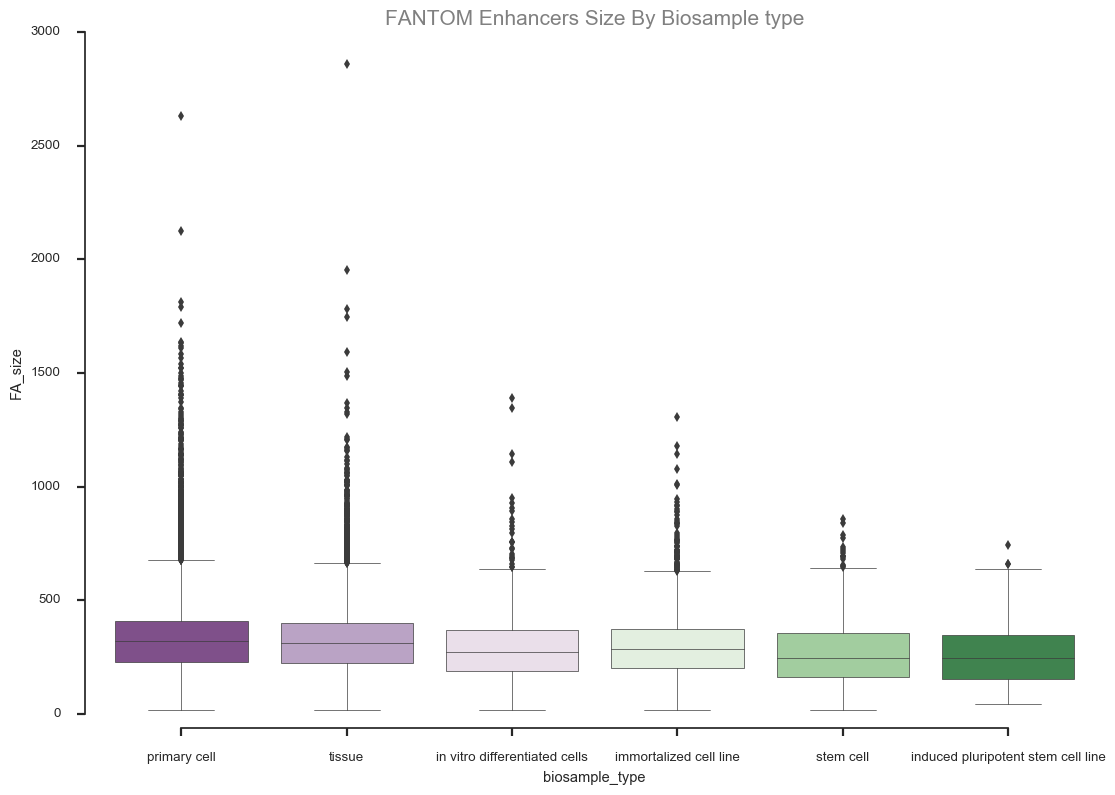

In [127]:
plot = sns.boxplot(x="biosample_type", y="FA_size", data=df_fantom_only, palette="PRGn")
plot.axes.set_title('FANTOM Enhancers Size By Biosample type', fontsize=15,color="black",alpha=0.5)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.5})
#plot.set_ybound(upper=5000)
#plot.set_xticklabels(labels=df_encode_only['biosample_type'].unique())
#for item in plot.get_xticklabels():
#    item.set_rotation(90)
#plot.set_yscale("log")
sns.despine(offset=10, trim=True)

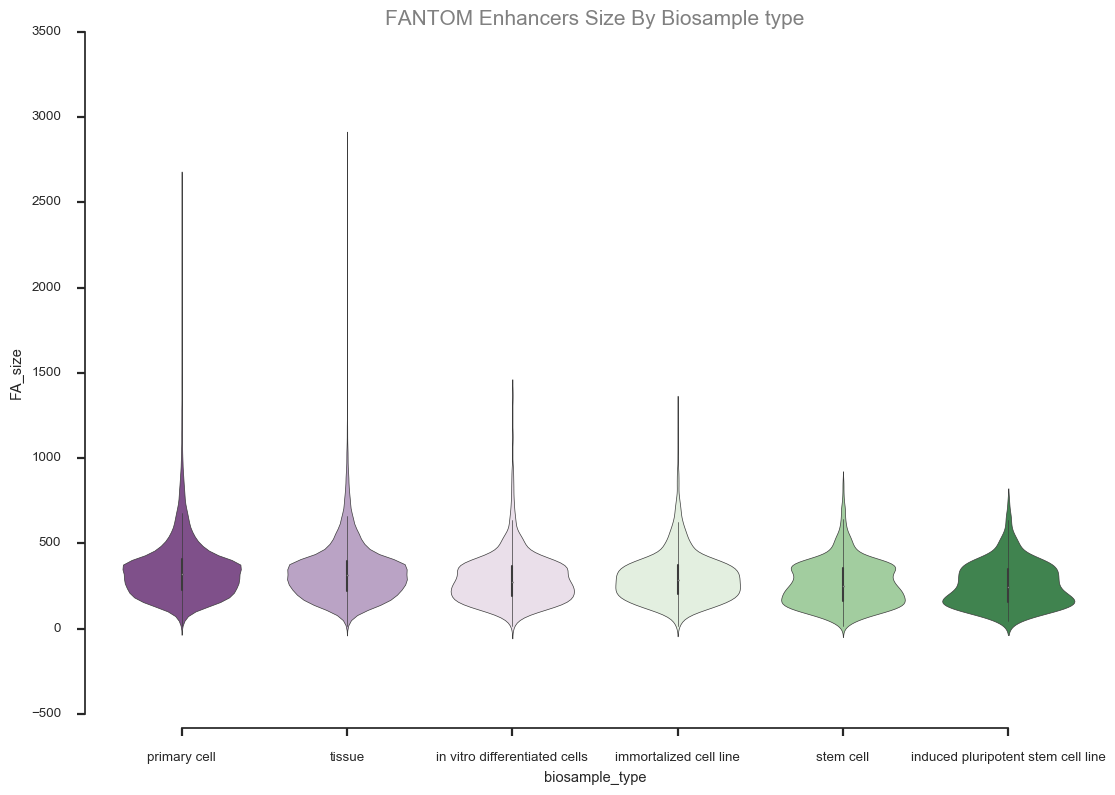

In [128]:
plot = sns.violinplot(x="biosample_type", y="FA_size", data=df_fantom_only, palette="PRGn")
plot.axes.set_title('FANTOM Enhancers Size By Biosample type', fontsize=15,color="black",alpha=0.5)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.5})
#plot.set_ybound(upper=5000)
#plot.set_xticklabels(labels=df_encode_only['biosample_type'].unique())
#for item in plot.get_xticklabels():
#    item.set_rotation(90)
#plot.set_yscale("log")
sns.despine(offset=10, trim=True)

In [129]:
df_encode_only.sort_values(by='chrom', inplace=True)

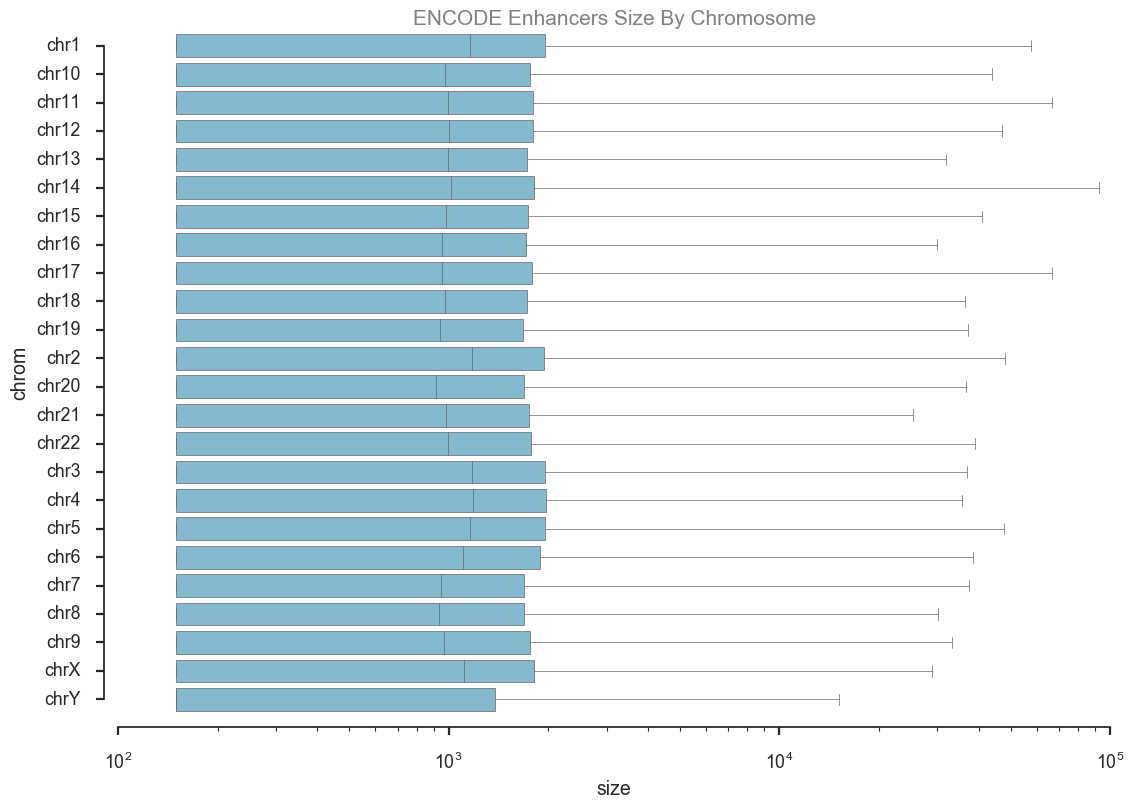

In [130]:
import numpy as np
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.5})

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="size", y="chrom", data=df_encode_only,
                 whis=np.inf, color="c")

ax.axes.set_title('ENCODE Enhancers Size By Chromosome', fontsize=15,color="black",alpha=0.5)

# Add in points to show each observation
#sns.stripplot(x="size", y="chrom", data=df_encode_only,
 #             jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
ax.set_xscale("log")
sns.despine(offset=10,trim=True)

In [131]:
df_encode_only.sort_values(by='biosample_term_name', inplace=True)

/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2056: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2057: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2070: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2077: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)


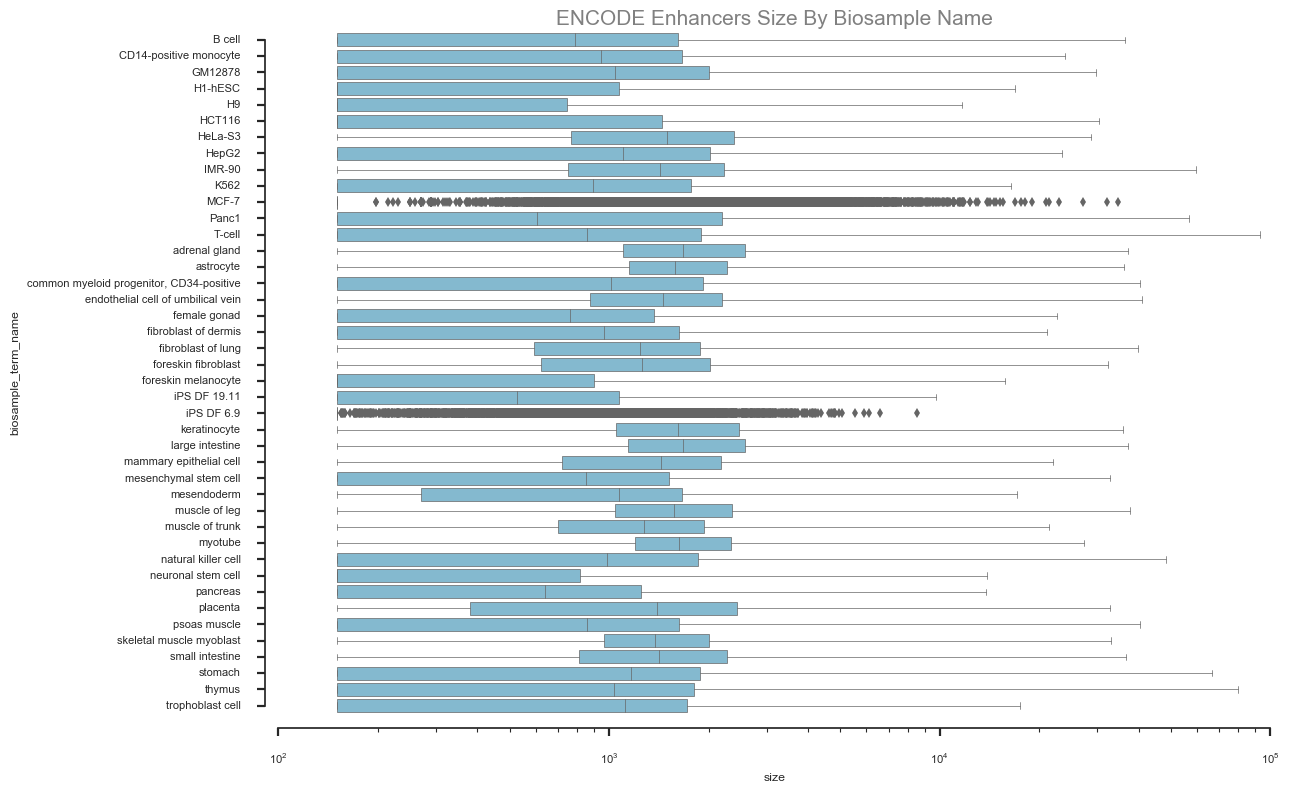

In [132]:
import numpy as np
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 0.5})

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="size", y="biosample_term_name", data=df_encode_only,
                 whis=np.inf, color="c")
ax.axes.set_title('ENCODE Enhancers Size By Biosample Name', fontsize=15,color="black",alpha=0.5)

# Add in points to show each observation
#sns.stripplot(x="size", y="chrom", data=df_encode_only,
 #             jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
ax.set_xscale("log")
sns.despine(offset=10,trim=True)

In [133]:
df_fantom_only.sort_values(by='FA_chrom', inplace=True)

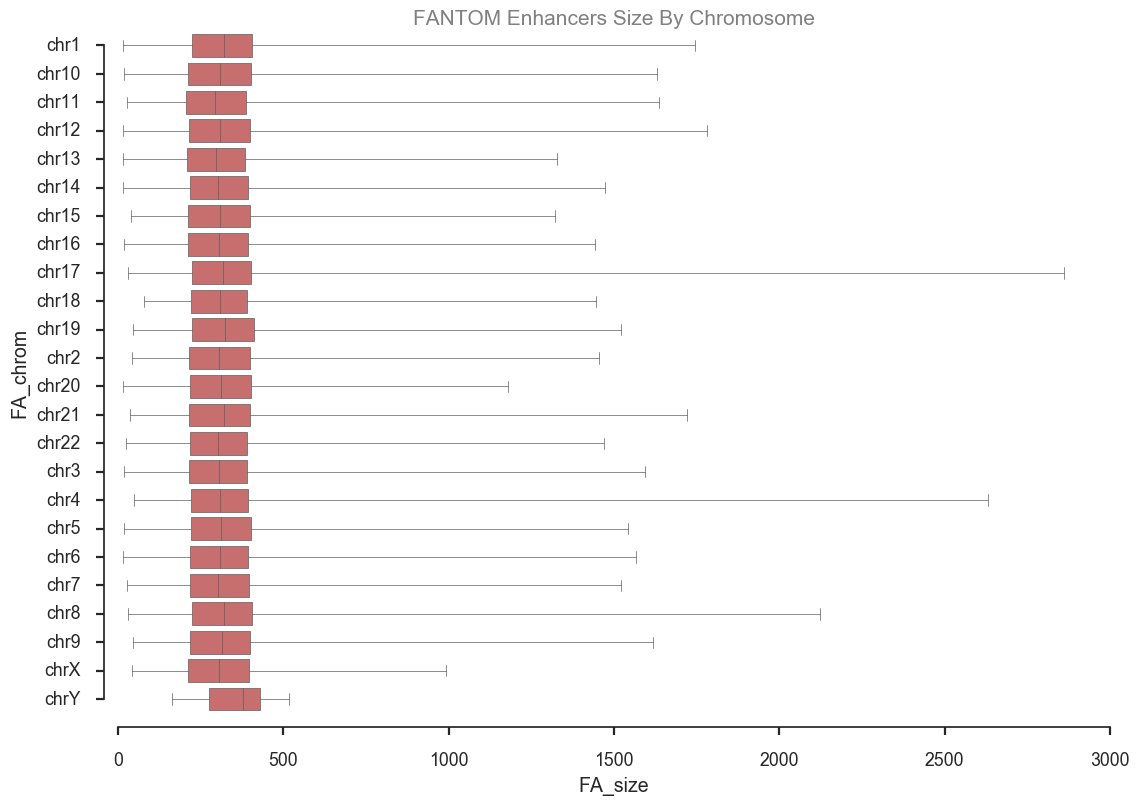

In [134]:
import numpy as np
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.5})

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="FA_size", y="FA_chrom", data=df_fantom_only,
                 whis=np.inf, color="r")
ax.axes.set_title('FANTOM Enhancers Size By Chromosome', fontsize=15,color="black",alpha=0.5)
# Add in points to show each observation
#sns.stripplot(x="size", y="chrom", data=df_encode_only,
 #             jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
#ax.set_xscale("log")
sns.despine(offset=10,trim=True)

In [135]:
df_fantom_only.sort_values(by='biosample_term_name', inplace=True)

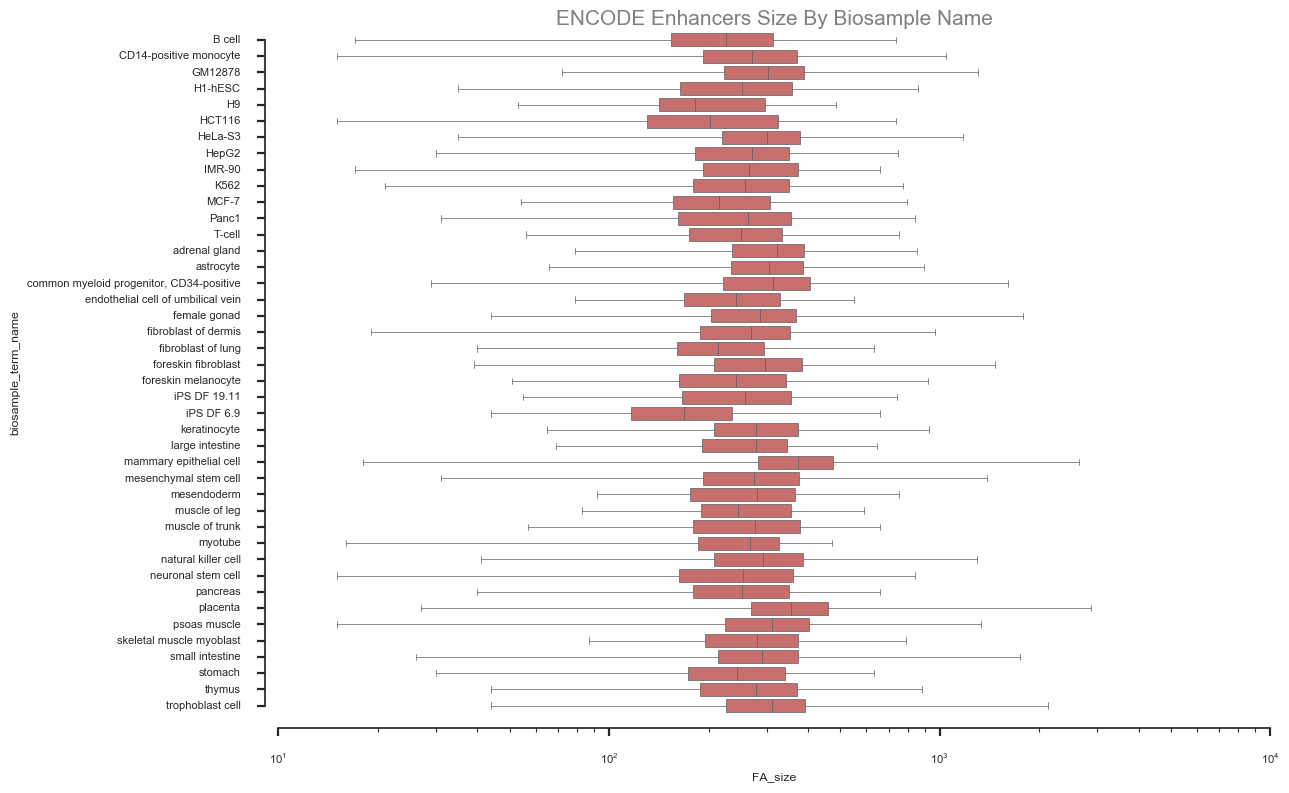

In [136]:
import numpy as np
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 0.5})

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="FA_size", y="biosample_term_name", data=df_fantom_only,
                 whis=np.inf, color="r")

ax.axes.set_title('ENCODE Enhancers Size By Biosample Name', fontsize=15,color="black",alpha=0.5)
# Add in points to show each observation
#sns.stripplot(x="size", y="chrom", data=df_encode_only,
 #             jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
ax.set_xscale("log")
sns.despine(offset=10,trim=True)

In [137]:
overlaps_only_df = encode_fantom_df.query("FA_name != '.'")

In [138]:
len(encode_fantom_df)

1801781

In [139]:
len(overlaps_only_df)

212041

In [140]:
overlaps_only_df[['biosample_type', 'biosample_term_name', 'FA_ovlp_pct', 'FA_score']].groupby(
    ['biosample_type', 'biosample_term_name']).agg(['mean', 'std', 'count'])

FA_ovlp_pct  \
                                                                                   mean   
biosample_type                     biosample_term_name                                    
immortalized cell line             GM12878                                    40.869524   
                                   HCT116                                     54.623761   
                                   HeLa-S3                                    29.395563   
                                   HepG2                                      43.241331   
                                   K562                                       42.625706   
                                   MCF-7                                      65.394066   
                                   Panc1                                      48.510403   
in vitro differentiated cells      mesenchymal stem cell                      43.737903   
                                   mesendoderm                                36.838360   
                                   myotube                                    23.970027   
induced pluripotent stem cell line iPS DF 19.11                               48.536299   
                                   iPS DF 6.9                                 71.093788   
primary cell                       B cell                                     41.065726   
                                   CD14-positive monocyte                     47.760575   
                                   IMR-90                                     35.315110   
                                   T-cell                                     35.783622   
                                   astrocyte                                  25.051362   
                                   common myeloid progenitor, CD34-positive   43.887727   
                                   endothelial cell of umbilical vein         27.823480   
                                   fibroblast of dermis                       39.154385   
                                   fibroblast of lung                         32.399206   
                                   foreskin fibroblast                        35.406764   
                                   foreskin melanocyte                        61.788831   
                                   keratinocyte                               26.853061   
                                   mammary epithelial cell                    30.021350   
                                   natural killer cell                        44.340546   
                                   skeletal muscle myoblast                   29.730055   
                                   trophoblast cell                           34.805758   
stem cell                          H1-hESC                                    56.039443   
                                   H9                                         55.782470   
                                   neuronal stem cell                         57.346574   
tissue                             adrenal gland                              24.092500   
                                   female gonad                               43.772437   
                                   large intestine                            24.090990   
                                   muscle of leg                              24.068121   
                                   muscle of trunk                            30.203667   
                                   pancreas                                   53.609018   
                                   placenta                                   29.416951   
                                   psoas muscle                               51.415829   
                                   small intestine                            27.246610   
                                   stomach                                    35.297446   
                                   thymus                               

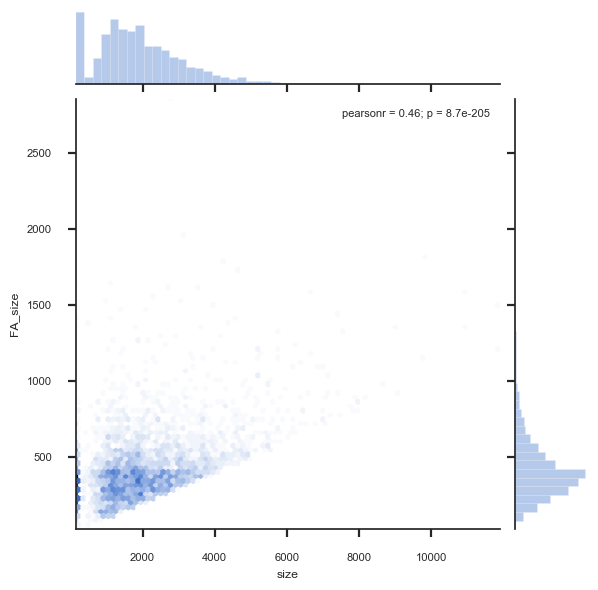

In [141]:
sample_df = encode_fantom_df.query('biosample_term_name == "placenta" & FA_ovlp_pct > 0')
sns.jointplot(x="size", y="FA_size", data=sample_df, kind='hex')

In [142]:
import scipy
print(scipy.stats.pearsonr(sample_df[['size']], sample_df[['FA_size']]))
print(scipy.stats.spearmanr(sample_df[['size']], sample_df[['FA_size']]))
print(scipy.stats.pearsonr(sample_df[['FA_score']], sample_df[['FA_ovlp_pct']]))

(array([ 0.46269671]), array([  8.67467821e-205]))
SpearmanrResult(correlation=0.42043188656363689, pvalue=9.5988969329638805e-166)
(array([ 0.02854977]), array([ 0.07564416]))


/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


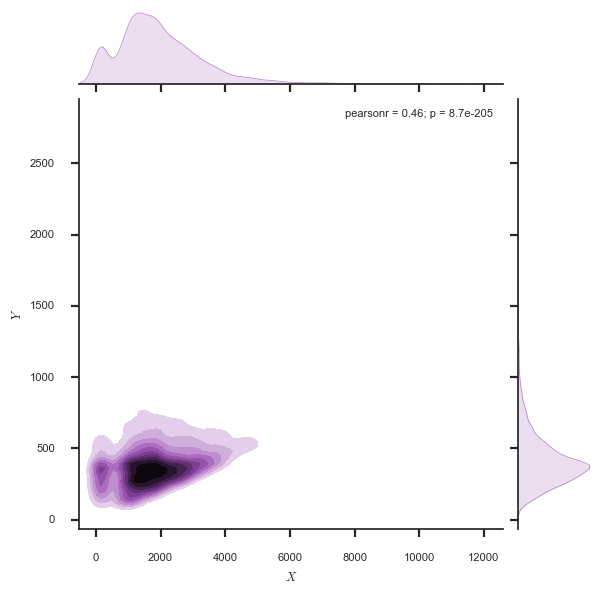

In [143]:
g = sns.jointplot(x="size", y="FA_size", data=sample_df, kind="kde", color="m")
#g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


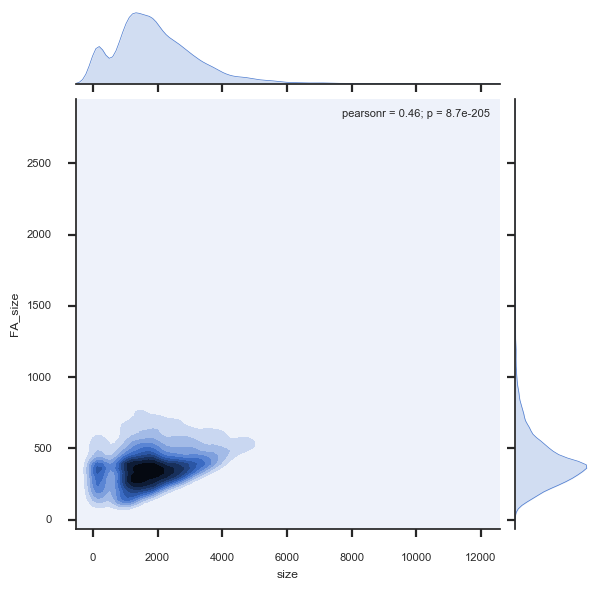

In [144]:
sns.jointplot(x="size", y="FA_size", data=sample_df, kind="kde");

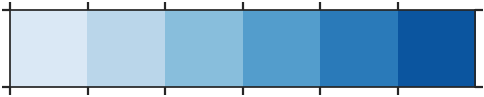

In [145]:
sns.palplot(sns.color_palette("Blues"))

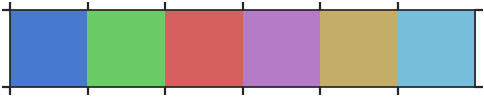

In [146]:
sns.palplot(sns.color_palette("muted"))

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


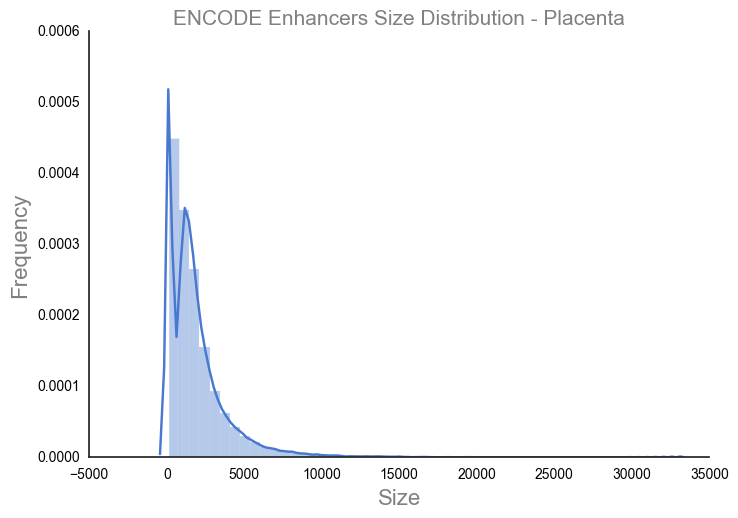

In [147]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)

d = df_encode_only.query('biosample_term_name == "placenta" & size > 0')[['size']]
#d = df_encode_only.query('size > 0')[['size']]

# Plot a simple histogram with binsize determined automatically
g = sns.distplot(d, kde=True, color="b")
g.axes.set_title('ENCODE Enhancers Size Distribution - Placenta', fontsize=15,color="black",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("Size",size = 16,color="black",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Frequency",size = 16,color="black",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=10,labelcolor="black")
#ax.set_xscale("log")
sns.despine(offset=0,trim=True)

In [148]:
df_encode_only = encode_fantom_df[['chrom', 'start', 'end', 'name', 'score', 'strand', 'size', 'method',
       'description', 'assembly', 'biosample_type', 'biosample_term_id',
       'biosample_term_name', 'developmental_slims', 'system_slims',
       'organ_slims', 'encyclopedia']]
#df_encode_only.reset_index(level=0, inplace=True)
df_encode_only = df_encode_only.drop_duplicates(subset='name')
df_fantom_only = encode_fantom_df.drop_duplicates(subset='name')

In [149]:
encode_fantom_df_placenta = encode_fantom_df.query('biosample_term_name == "placenta" & FA_size > 0')
encode_fantom_df_placenta[['size', 'FA_size']].describe()

size      FA_size
count   3873.000000  3873.000000
mean    1965.983475   424.526723
std     1334.015118   214.715245
min      150.000000    27.000000
25%     1116.000000   294.000000
50%     1766.000000   383.000000
75%     2625.000000   501.000000
max    11921.000000  2860.000000

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


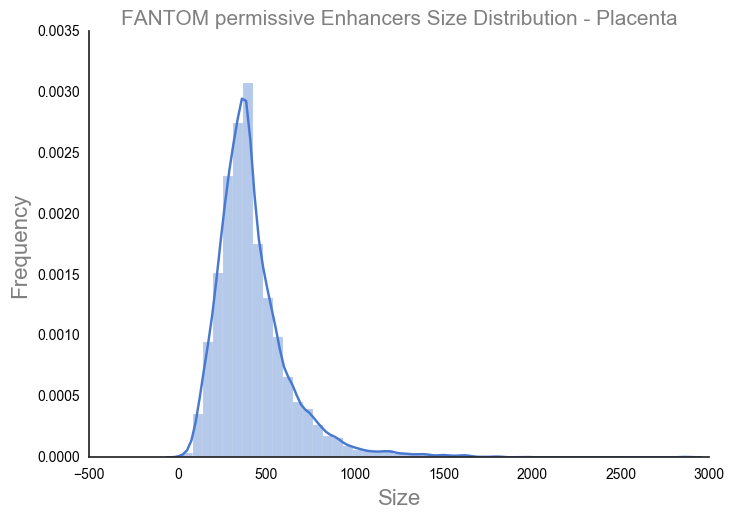

In [150]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)

d = encode_fantom_df.query('biosample_term_name == "placenta" & FA_size > 0')[['FA_size']]
#d = df_encode_only.query('size > 0')[['size']]

# Plot a simple histogram with binsize determined automatically
g = sns.distplot(d, kde=True, color="b")
g.axes.set_title('FANTOM permissive Enhancers Size Distribution - Placenta', fontsize=15,color="black",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("Size",size = 16,color="black",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Frequency",size = 16,color="black",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=10,labelcolor="black")
#ax.set_xscale("log")
sns.despine(offset=0,trim=True)

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


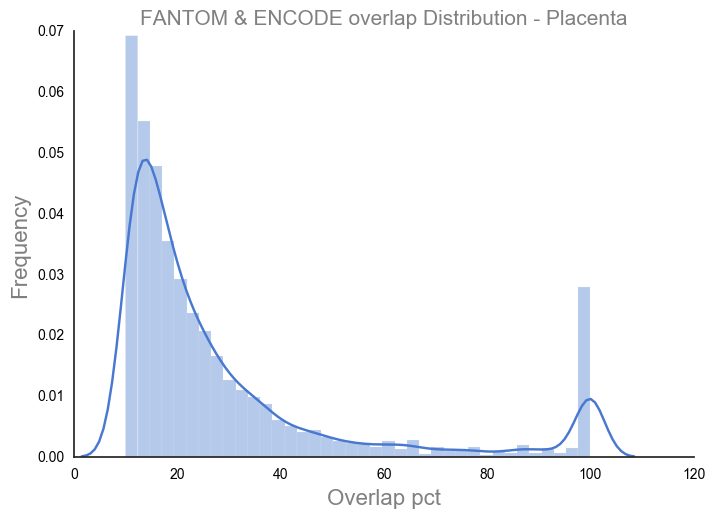

In [151]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)

d = encode_fantom_df.query('biosample_term_name == "placenta" & FA_size > 0')[['FA_ovlp_pct']]
#d = df_encode_only.query('size > 0')[['size']]

# Plot a simple histogram with binsize determined automatically
g = sns.distplot(d, kde=True, color="b")

g.axes.set_title('FANTOM & ENCODE overlap Distribution - Placenta', fontsize=15,color="black",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("Overlap pct",size = 16,color="black",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Frequency",size = 16,color="black",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=10,labelcolor="black")
#ax.set_xscale("log")
sns.despine(offset=0,trim=True)

In [152]:
data = df_encode_only.query('biosample_term_name == "placenta" & size > 0')[['size']]
data.describe()

size
count  38389.000000
mean    1879.675949
std     2038.726097
min      150.000000
25%      380.000000
50%     1397.000000
75%     2439.000000
max    32806.000000

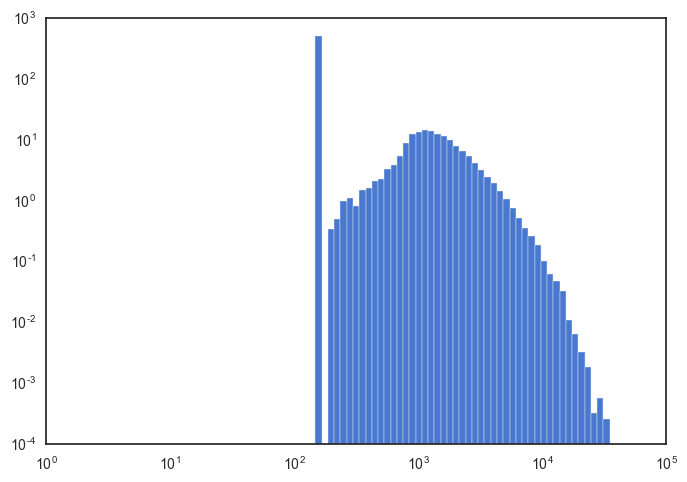

In [153]:
import numpy as np
from matplotlib import pyplot as plt

# something random to plot
#data = (np.random.random(10000)*10)**3
data = df_encode_only.query('biosample_term_name == "placenta" & size > 0')[['size']]
# log-scaled bins
bins = np.logspace(0, 5, 100)
widths = (bins[1:] - bins[:-1])

# Calculate histogram
hist = np.histogram(data, bins=bins)
# normalize by bin width
hist_norm = hist[0]/widths

# plot it!
plt.bar(bins[:-1], hist_norm, widths)
plt.xscale('log')
plt.yscale('log')

In [154]:
encode_fantom_df.describe()

start           end      score          size      FA_start  \
count  1.801781e+06  1.801781e+06  1801781.0  1.801781e+06  1.801781e+06   
mean   7.480117e+07  7.480249e+07        1.0  1.321550e+03  8.959037e+06   
std    5.501282e+07  5.501285e+07        0.0  1.489428e+03  3.147939e+07   
min    5.840000e+03  6.742000e+03        1.0  1.500000e+02 -1.000000e+00   
25%    3.211176e+07  3.211347e+07        1.0  1.500000e+02 -1.000000e+00   
50%    6.250488e+07  6.250626e+07        1.0  1.048000e+03 -1.000000e+00   
75%    1.107457e+08  1.107458e+08        1.0  1.828000e+03 -1.000000e+00   
max    2.492398e+08  2.492404e+08        1.0  9.282900e+04  2.491573e+08   

             FA_end      FA_score       FA_size   FA_ovlp_len   FA_ovlp_pct  
count  1.801781e+06  1.801781e+06  1.801781e+06  1.801781e+06  1.801781e+06  
mean   8.959085e+06  1.660282e+01  4.735484e+01  3.952389e+01  4.582093e+00  
std    3.147950e+07  1.450117e+02  1.477957e+02  1.292502e+02  1.652188e+01  
min   -1.000000e+00 -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%   -1.000000e+00 -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
50%   -1.000000e+00 -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
75%   -1.000000e+00 -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
max    2.491577e+08  8.368000e+03  2.860000e+03  2.860000e+03  1.000000e+02

In [155]:
encode_fantom_df.describe()

start           end      score          size      FA_start  \
count  1.801781e+06  1.801781e+06  1801781.0  1.801781e+06  1.801781e+06   
mean   7.480117e+07  7.480249e+07        1.0  1.321550e+03  8.959037e+06   
std    5.501282e+07  5.501285e+07        0.0  1.489428e+03  3.147939e+07   
min    5.840000e+03  6.742000e+03        1.0  1.500000e+02 -1.000000e+00   
25%    3.211176e+07  3.211347e+07        1.0  1.500000e+02 -1.000000e+00   
50%    6.250488e+07  6.250626e+07        1.0  1.048000e+03 -1.000000e+00   
75%    1.107457e+08  1.107458e+08        1.0  1.828000e+03 -1.000000e+00   
max    2.492398e+08  2.492404e+08        1.0  9.282900e+04  2.491573e+08   

             FA_end      FA_score       FA_size   FA_ovlp_len   FA_ovlp_pct  
count  1.801781e+06  1.801781e+06  1.801781e+06  1.801781e+06  1.801781e+06  
mean   8.959085e+06  1.660282e+01  4.735484e+01  3.952389e+01  4.582093e+00  
std    3.147950e+07  1.450117e+02  1.477957e+02  1.292502e+02  1.652188e+01  
min   -1.000000e+00 -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%   -1.000000e+00 -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
50%   -1.000000e+00 -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
75%   -1.000000e+00 -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
max    2.491577e+08  8.368000e+03  2.860000e+03  2.860000e+03  1.000000e+02

In [156]:
#grouped = encode_fantom_df[['FA_name', 'biosample_term_name']].groupby(['FA_name']).agg(['count'])
encode_fantom_df_ovlp = encode_fantom_df.query("FA_name != '.' & FA_score > 50")
pivot = pd.pivot_table(encode_fantom_df_ovlp,index=["biosample_term_name"], values=["name"], columns=["chrom"],aggfunc=[len])

encode_fantom_df_scores = encode_fantom_df.query("FA_name != '.'")
pivot_scores = pd.pivot_table(encode_fantom_df_scores,
                              index=["biosample_term_name"], 
                              values=["FA_score"], columns=["chrom"],aggfunc=[np.mean])

pivot_ovlp_sizes = pd.pivot_table(encode_fantom_df_scores,
                              index=["biosample_term_name"], 
                              values=["FA_ovlp_pct"], columns=["chrom"],aggfunc=[np.mean])

In [157]:
encode_fantom_df_ovlp.size

2405079

In [158]:
pivot = pivot.fillna(0)
pivot_scores = pivot_scores.fillna(0)
pivot_ovlp_sizes = pivot_ovlp_sizes.fillna(0)

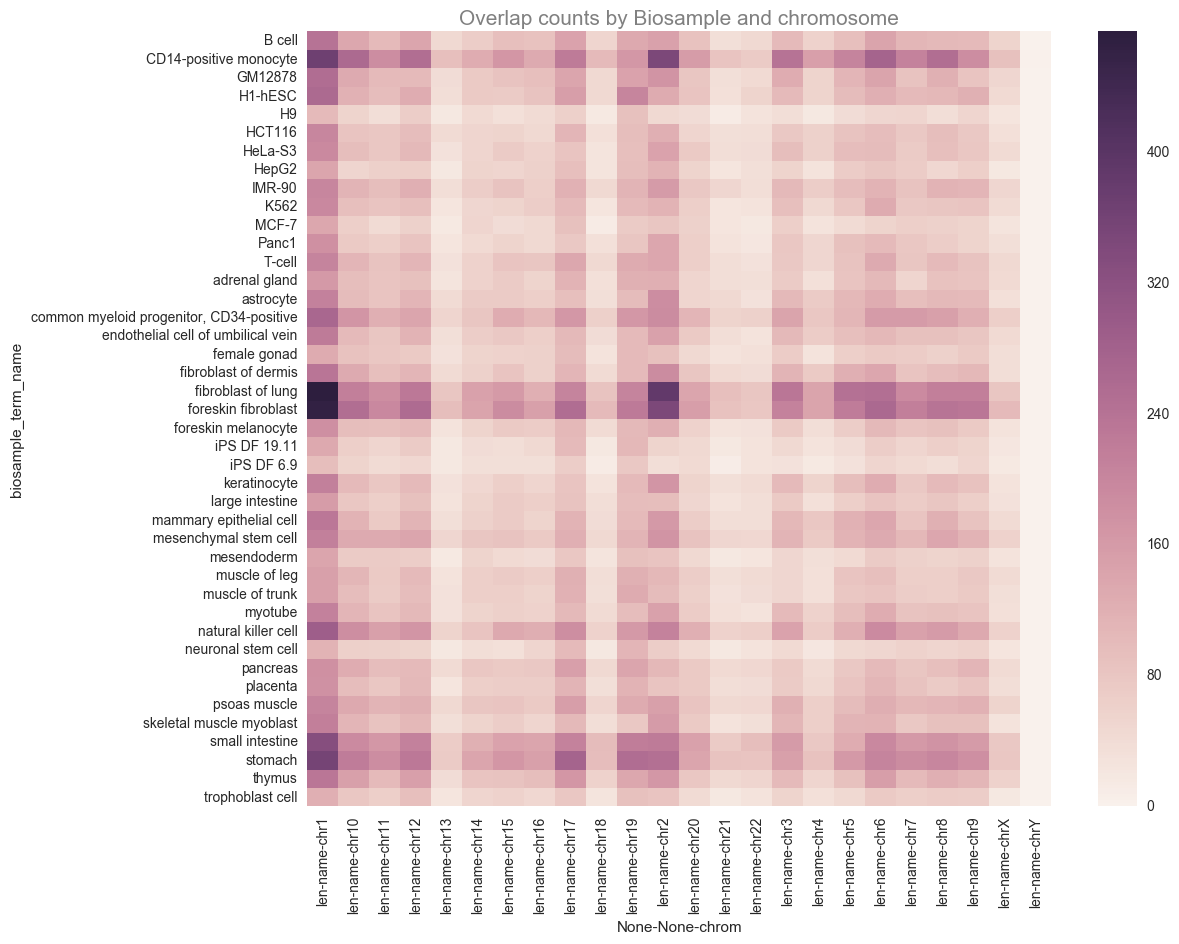

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,10))   
ax.axes.set_title('Overlap counts by Biosample and chromosome', fontsize=15,color="black",alpha=0.5)
sns.heatmap(pivot, annot=False, linewidths=0, ax=ax)


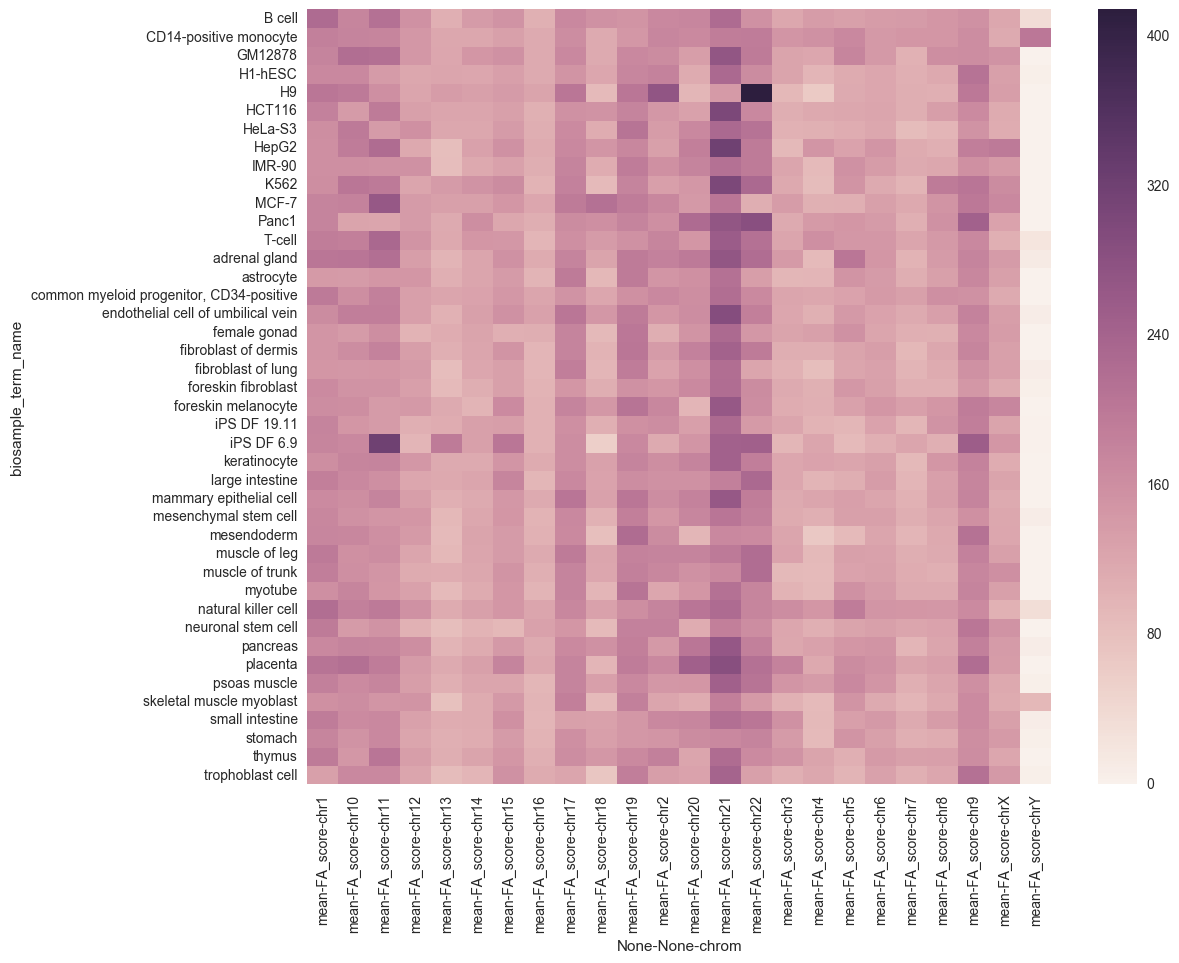

In [160]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,10))   
sns.heatmap(pivot_scores, annot=False, linewidths=0, ax=ax)

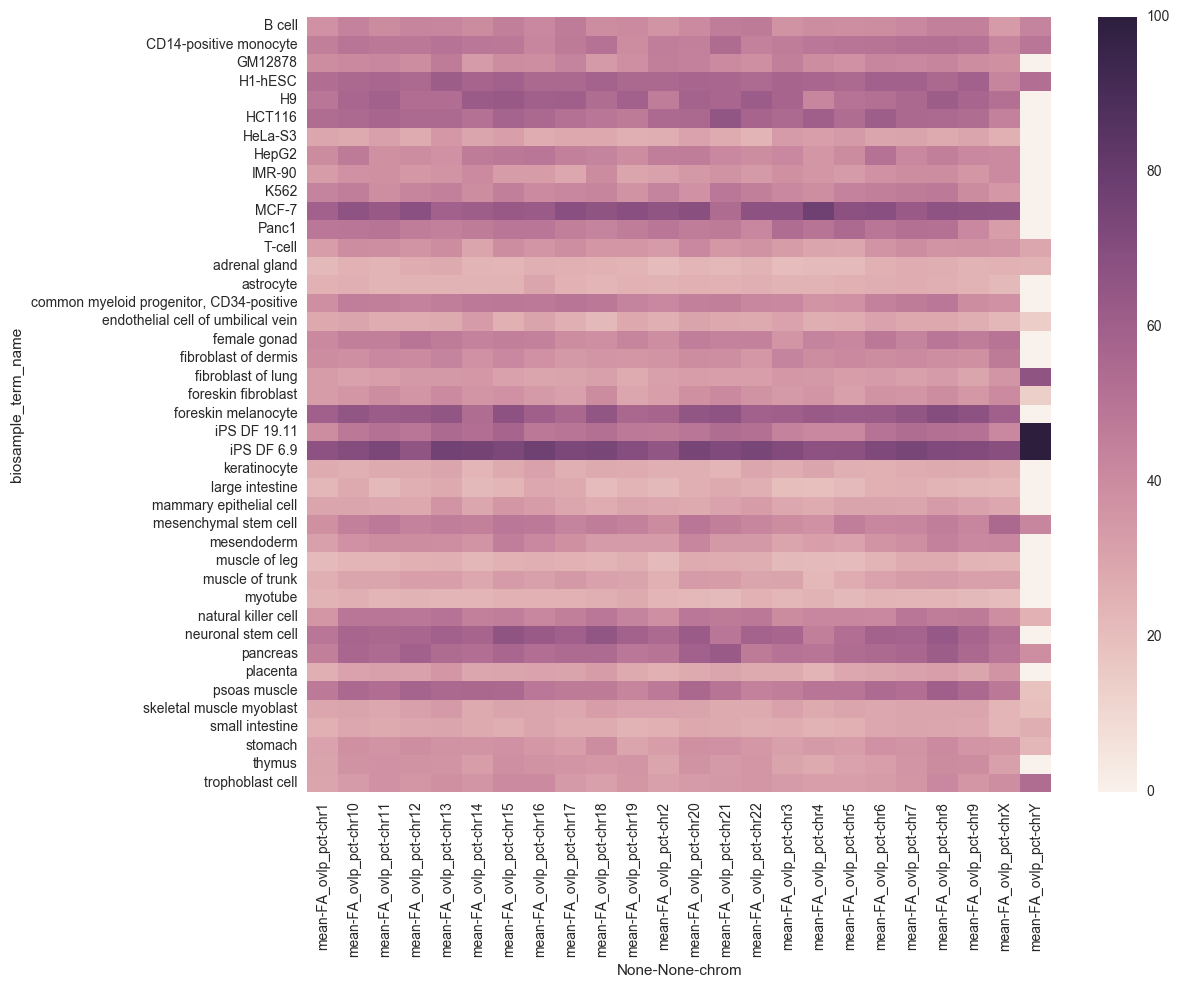

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,10))   
sns.heatmap(pivot_ovlp_sizes, annot=False, linewidths=0, ax=ax)

In [162]:
encode_fantom_df.T

0        \
chrom                                                             chr3   
start                                                        152855118   
end                                                          152861069   
name                                            ENCODE.3.ENCFF778PVS.0   
score                                                                1   
strand                                                               .   
size                                                              5951   
method                                                   DNase_H3K27ac   
description          Enhancer-like regions using DNase and H3K27ac ...   
assembly                                                          hg19   
biosample_type                                            primary cell   
biosample_term_id                                           CL:0002327   
biosample_term_name                            mammary epithelial cell   
developmental_slims                                       ['ectoderm']   
system_slims                                   ['integumental system']   
organ_slims                                          ['mammary gland']   
encyclopedia                                                    ENCODE   
FA_chrom                                                             .   
FA_start                                                            -1   
FA_end                                                              -1   
FA_name                                                              .   
FA_score                                                            -1   
FA_size                                                              0   
FA_method                                                            .   
FA_ovlp_len                                                          0   
FA_ovlp_pct                                                          0   
FA_encyclopedia                                                      .   

                                                               1        \
chrom                                                             chr1   
start                                                        214611302   
end                                                          214622352   
name                                            ENCODE.3.ENCFF778PVS.1   
score                                                                1   
strand                                                               .   
size                                                             11050   
method                                                   DNase_H3K27ac   
description          Enhancer-like regions using DNase and H3K27ac ...   
assembly                                                          hg19   
biosample_type                                            primary cell   
biosample_term_id                                           CL:0002327   
biosample_term_name                            mammary epithelial cell   
developmental_slims                                       ['ectoderm']   
system_slims                                   ['integumental system']   
organ_slims                                          ['mammary gland']   
encyclopedia                                                    ENCODE   
FA_chrom                                                             .   
FA_start                                                            -1   
FA_end                                                              -1   
FA_name                                                              .   
FA_score                                                            -1   
FA_size                                                              0   
FA_method                                                            .   
FA_ovlp_len                                                          0   
FA_ovlp_pct                                                       

In [168]:
encode_fantom_df_tissue = encode_fantom_df.query("biosample_type == 'tissue' & FA_name != '.' & FA_score > 0")
pivot = pd.pivot_table(
    encode_fantom_df_tissue,index=["biosample_term_name"], values=["FA_score"], columns=["chrom"],
    aggfunc=[np.mean])

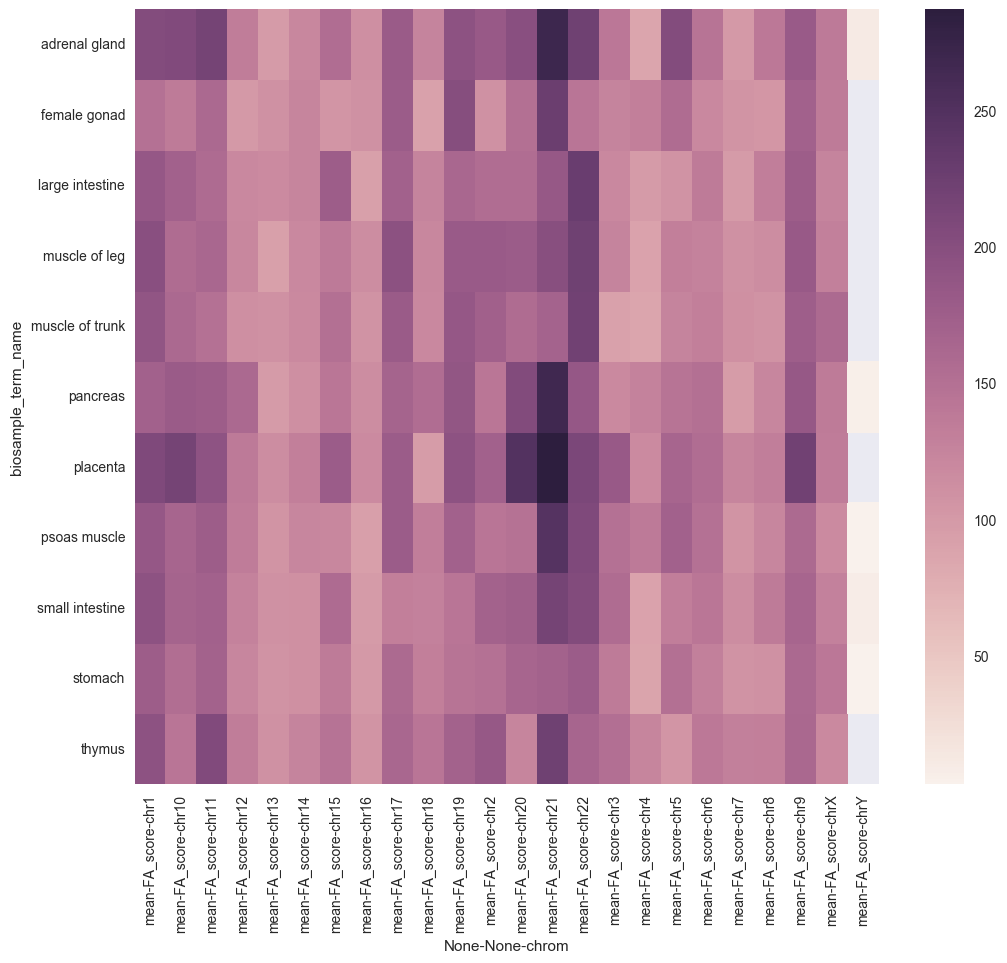

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,10))   
sns.heatmap(pivot, annot=False, linewidths=0, ax=ax)

In [165]:
# try to plot overlap pct vs FA_score
tissues_df = encode_fantom_df_tissue[['size', 'FA_size', 'FA_ovlp_pct', 'biosample_term_name','chrom']]

In [166]:
for i in range(0,3):
    for j in range(0,3):
        print(i,j)
        

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(0, 100)

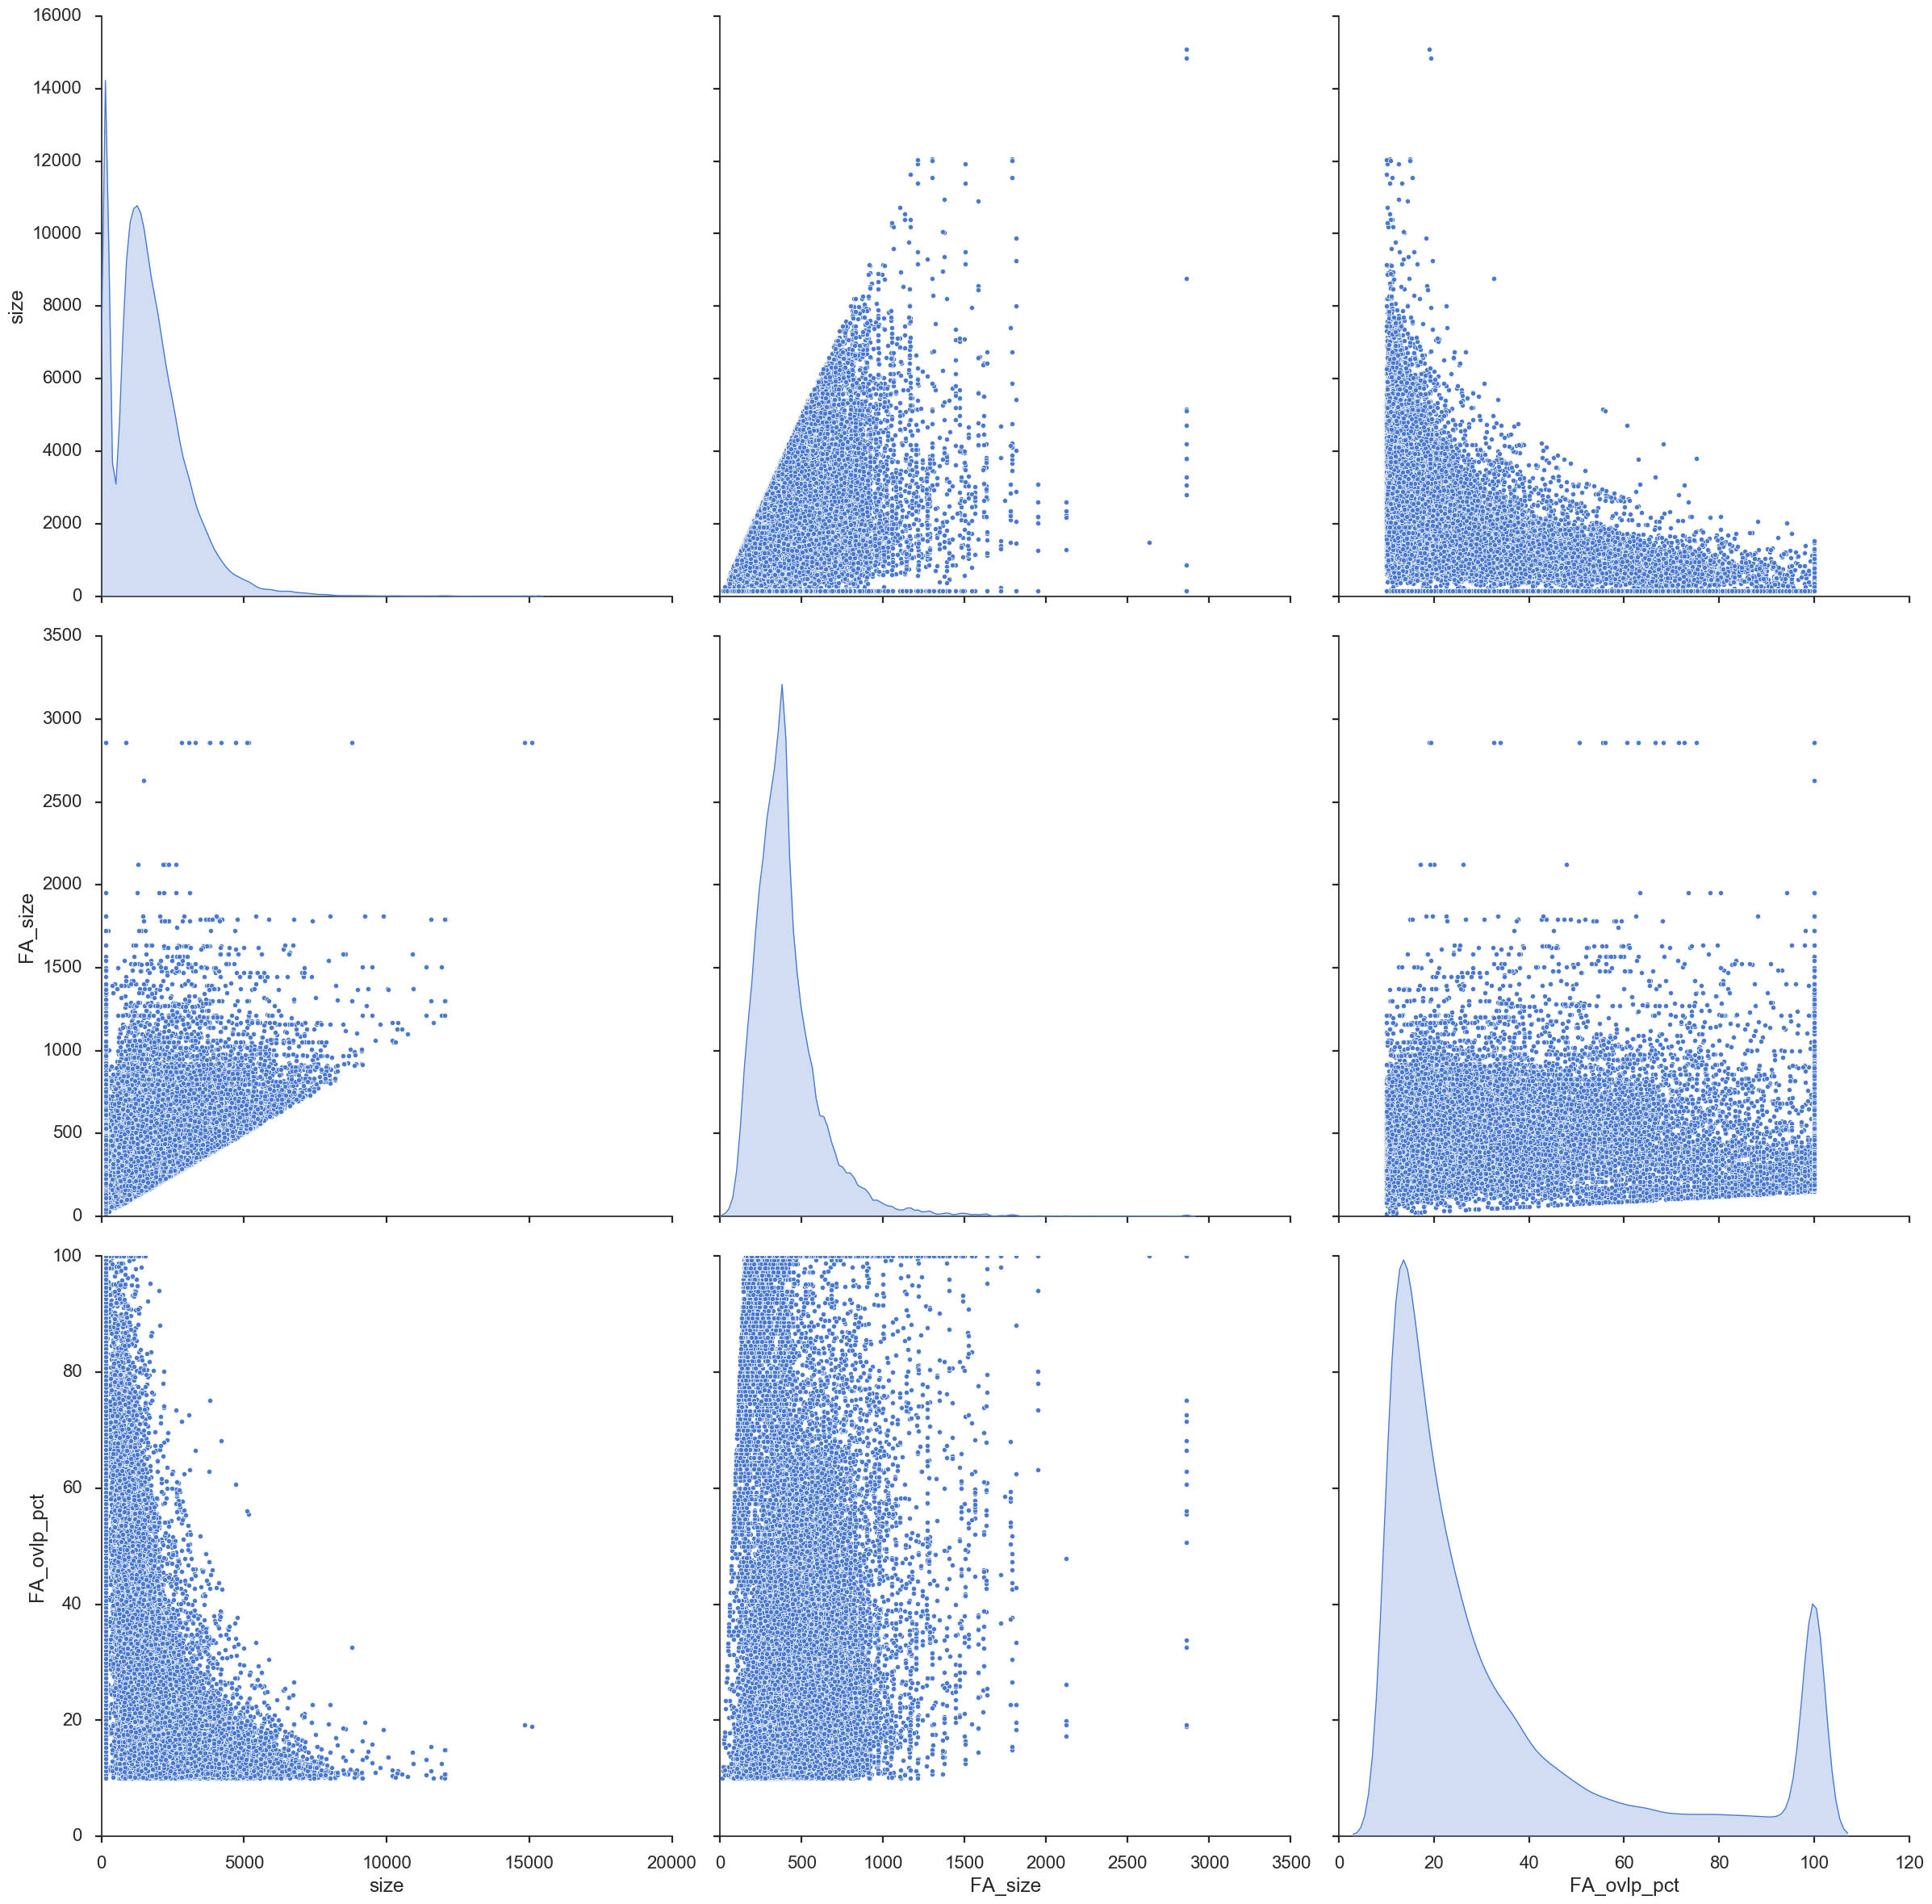

In [167]:
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=1, rc={"lines.linewidth": 1})   
g = sns.pairplot(tissues_df,  size=8, diag_kind='kde', diag_kws=dict(shade=True))


for i in range(0,3):
    for j in range(0,3):
        g.axes[i,j].set_ylim(0,)
        g.axes[i,j].set_xlim(0,)

g.axes[2,0].set_ylim(0,100)
g.axes[2,1].set_ylim(0,100)
#g.axes[2,0].set_ylim(0,100)

In [199]:
encode_fantom_df['biosample_type'].unique()

array(['primary cell', 'tissue', 'in vitro differentiated cells',
       'immortalized cell line', 'stem cell',
       'induced pluripotent stem cell line'], dtype=object)

In [204]:
encode_fantom_df_stem = encode_fantom_df.query("biosample_type == 'stem cell' & FA_name != '.' & FA_score > 0")
stems_df = encode_fantom_df_stem[['size', 'FA_size', 'FA_ovlp_pct', 'biosample_term_name','chrom']]


/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(0, 100)

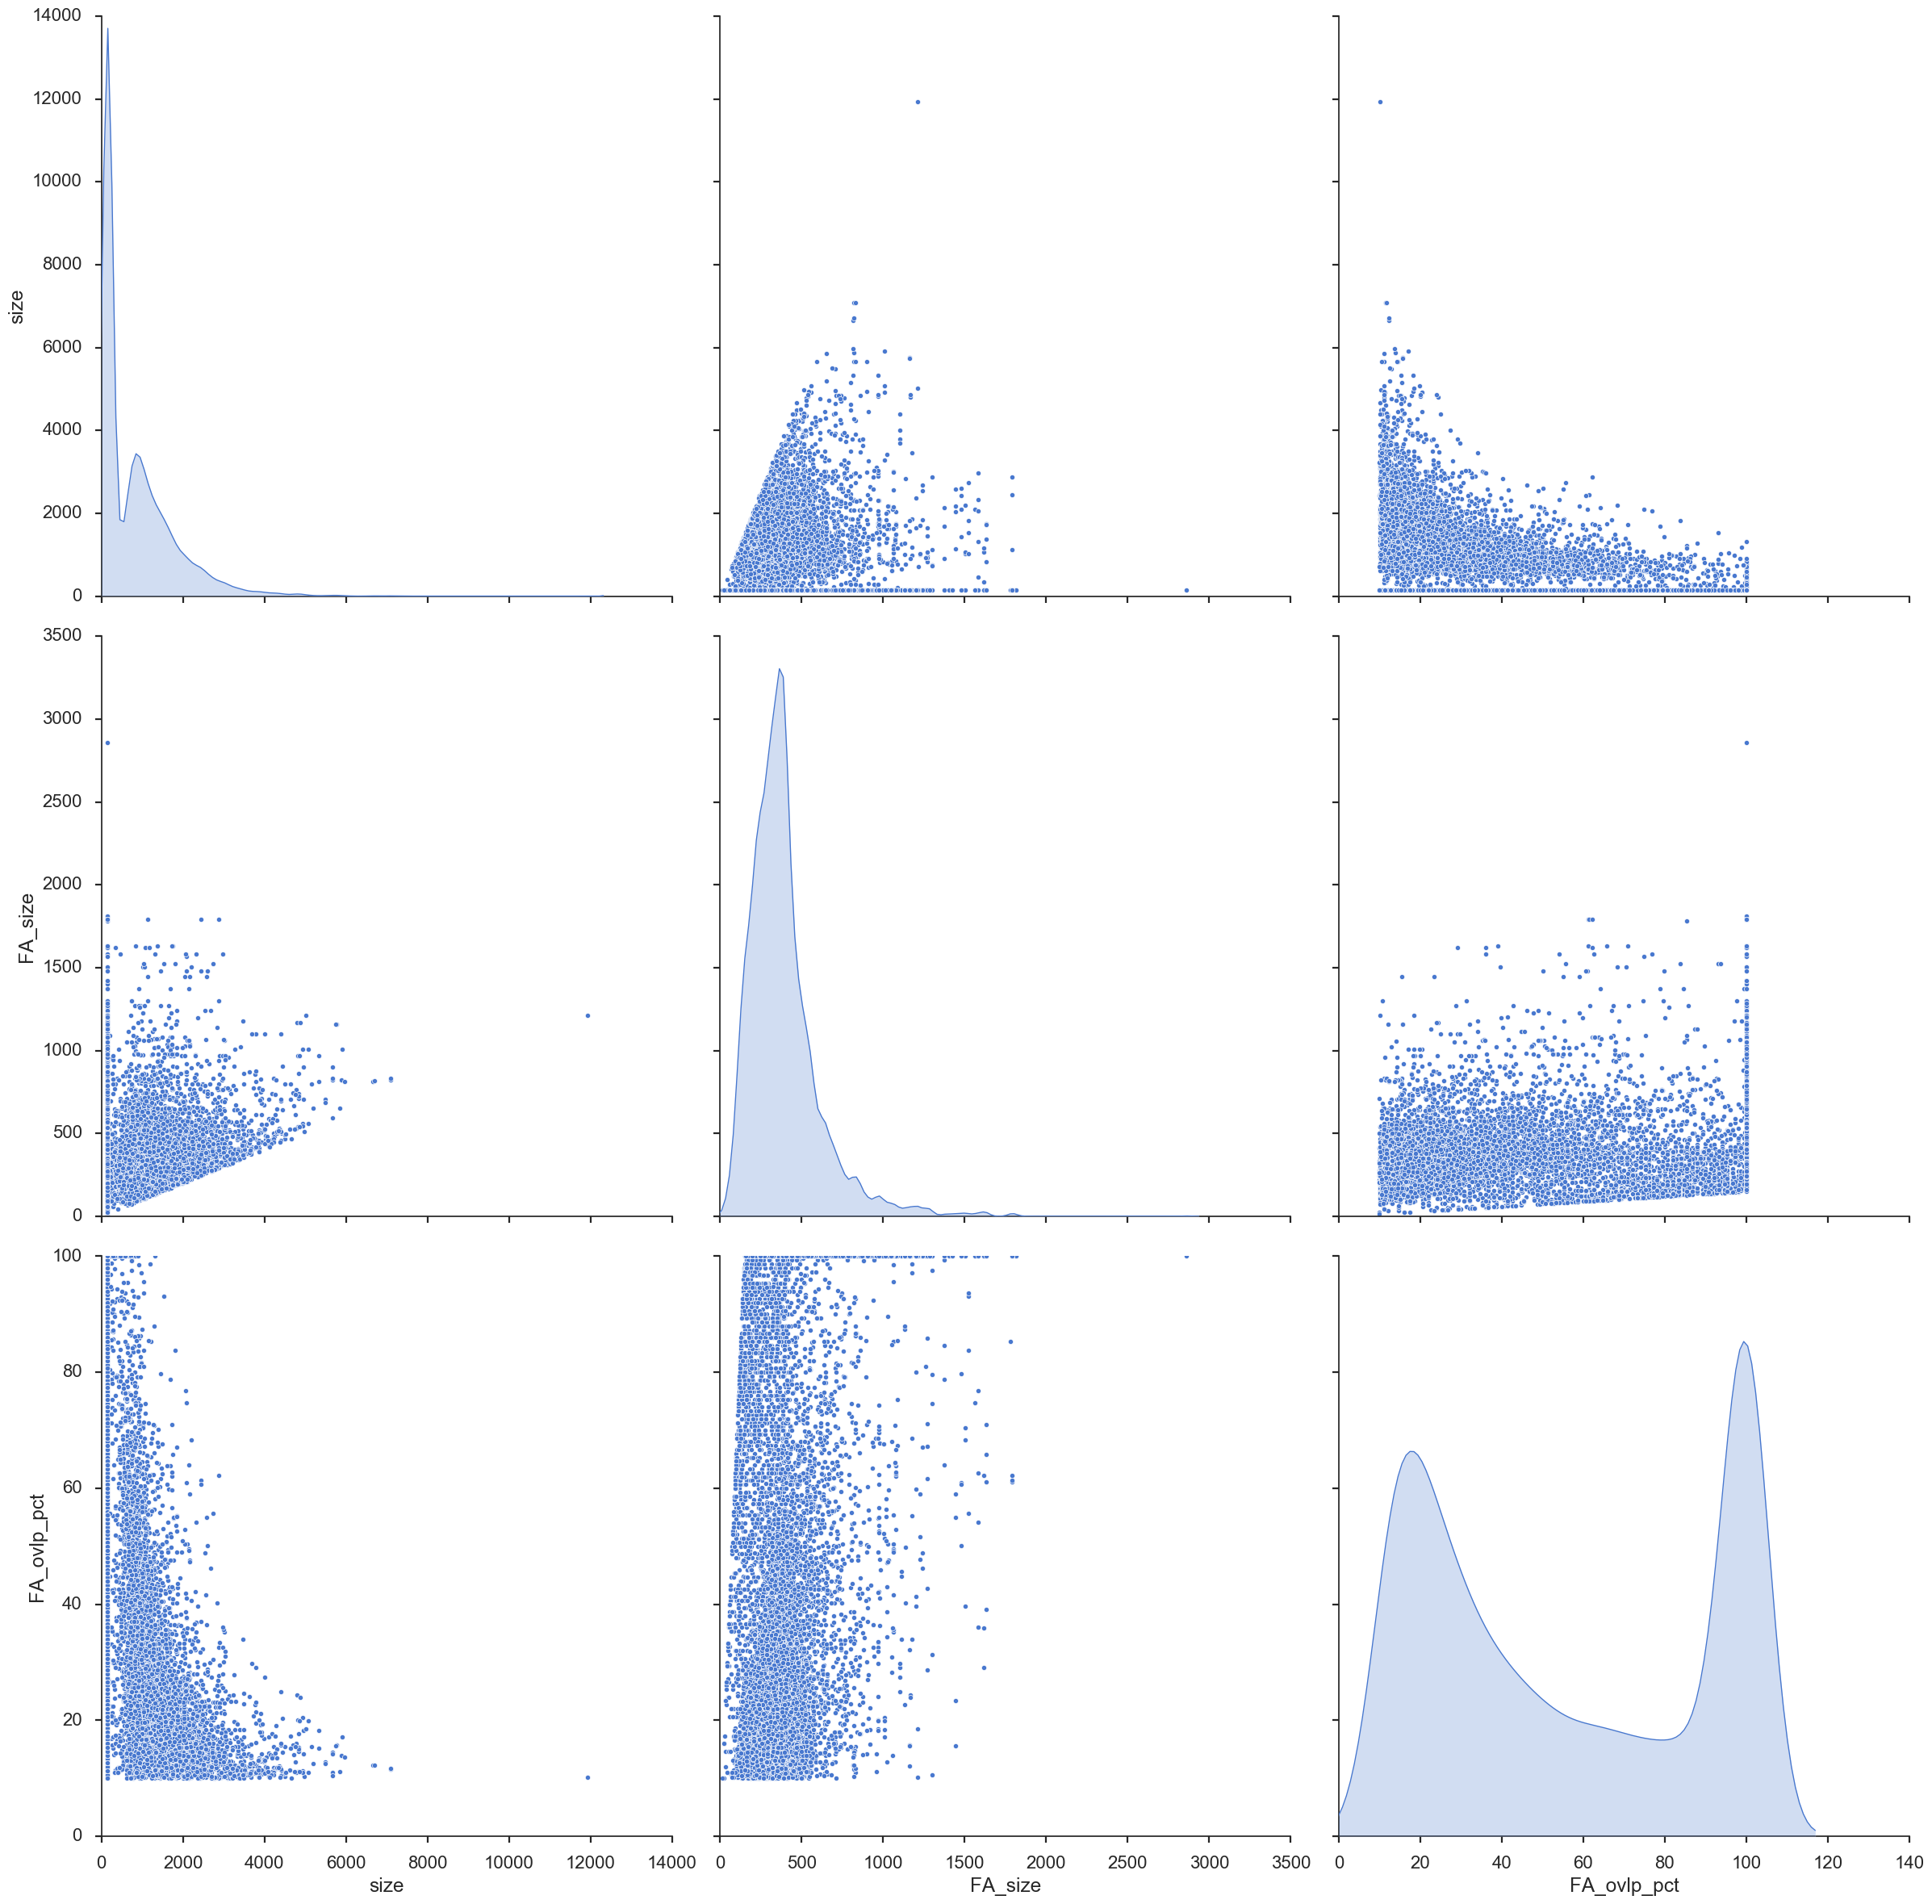

In [205]:
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=1, rc={"lines.linewidth": 1})   
g = sns.pairplot(stems_df,  size=8, diag_kind='kde', diag_kws=dict(shade=True))


for i in range(0,3):
    for j in range(0,3):
        g.axes[i,j].set_ylim(0,)
        g.axes[i,j].set_xlim(0,)

g.axes[2,0].set_ylim(0,100)
g.axes[2,1].set_ylim(0,100)
#g.axes[2,0].set_ylim(0,100)

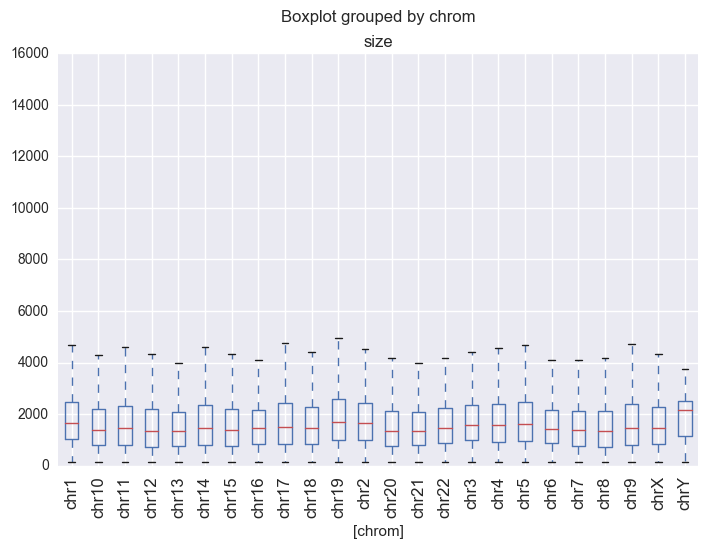

In [34]:
tissues_df[['chrom', 'size']].boxplot(by='chrom', rot=90)

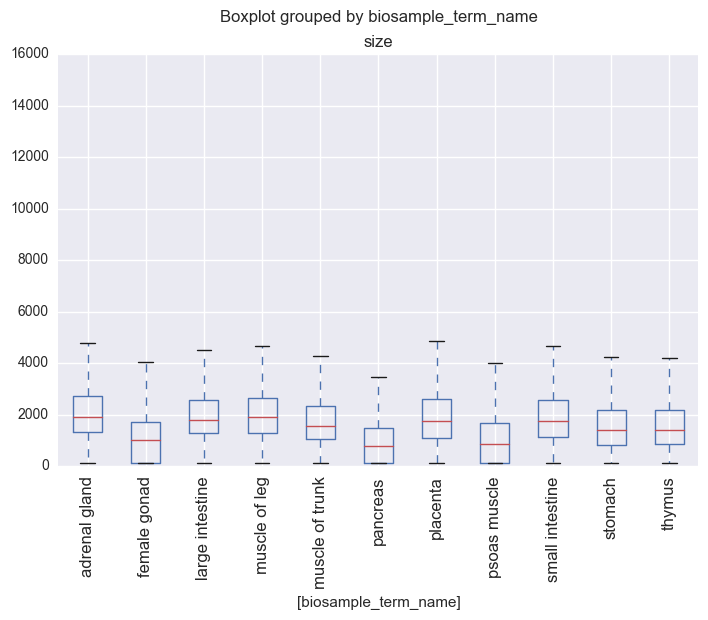

In [36]:
tissues_df[['biosample_term_name', 'size']].boxplot(by='biosample_term_name', rot=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1af076518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1921a5710>]], dtype=object)

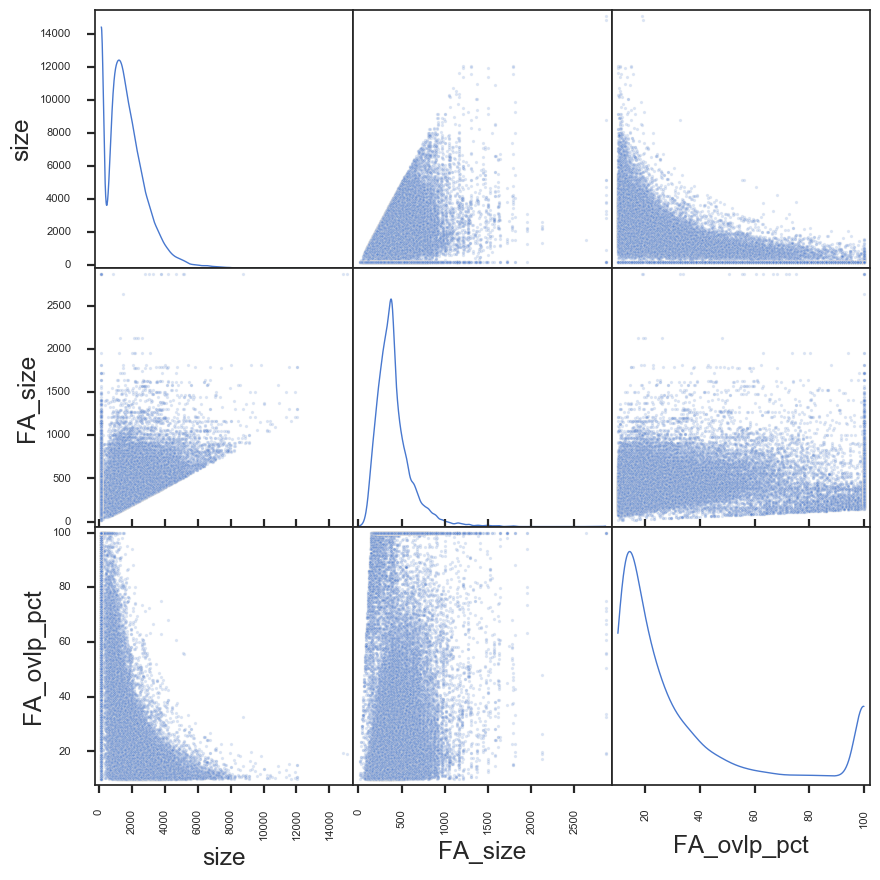

In [82]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(tissues_df, alpha=0.2, figsize=(10, 10), diagonal='kde')

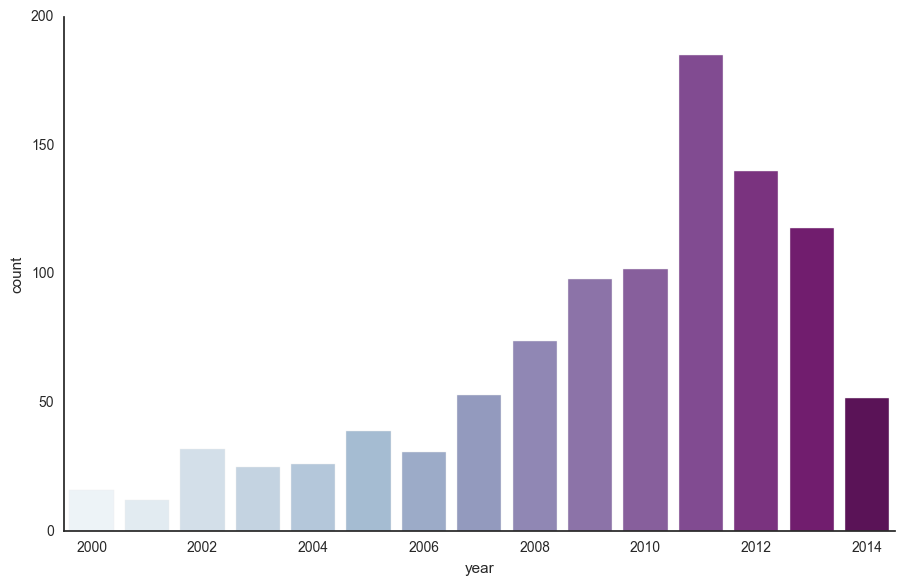

In [39]:
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set(style="white")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Make a range of years to show categories with no observations
years = np.arange(2000, 2015)

# Draw a count plot to show the number of planets discovered each year
g = sns.factorplot(x="year", data=planets, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=years)
g.set_xticklabels(step=2)

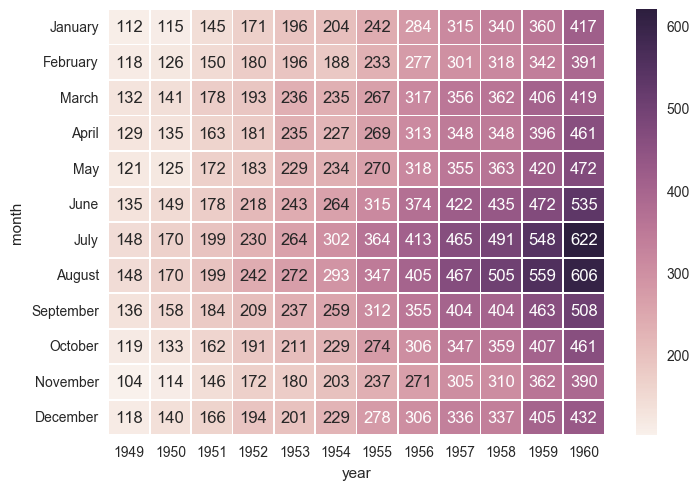

In [40]:
%matplotlib inline
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5)

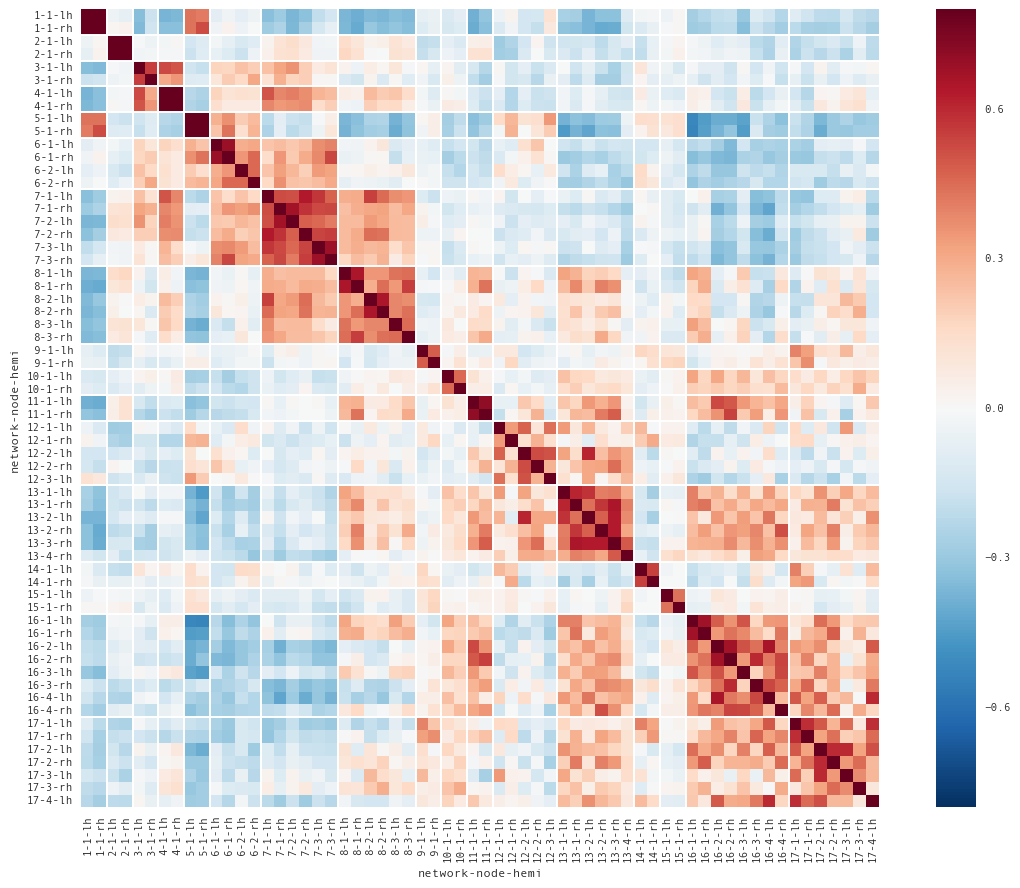

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()